In [1]:
!pip install numpy pandas matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df = pd.read_csv('./datasets/Unemployment in India.csv')

In [3]:
df

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
763                  NaN                                       NaN    NaN  
764                  NaN                                       NaN    NaN  
765                  NaN                                       NaN    NaN  
766                  NaN                                       NaN    NaN  
767                  NaN                                       NaN    NaN  

[768 rows x 7 columns]

In [4]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
df[' Date'] = pd.to_datetime(df[' Date'])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30736\1649268658.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


In [6]:
df[' Date']

0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
763          NaT
764          NaT
765          NaT
766          NaT
767          NaT
Name:  Date, Length: 768, dtype: datetime64[ns]

In [7]:
df.dropna(inplace = True)

In [8]:
df

Region       Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31    Monthly                              3.65   
1    Andhra Pradesh 2019-06-30    Monthly                              3.05   
2    Andhra Pradesh 2019-07-31    Monthly                              3.75   
3    Andhra Pradesh 2019-08-31    Monthly                              3.32   
4    Andhra Pradesh 2019-09-30    Monthly                              5.17   
..              ...        ...        ...                               ...   
749     West Bengal 2020-02-29    Monthly                              7.55   
750     West Bengal 2020-03-31    Monthly                              6.67   
751     West Bengal 2020-04-30    Monthly                             15.63   
752     West Bengal 2020-05-31    Monthly                             15.22   
753     West Bengal 2020-06-30    Monthly                              9.86   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
749           10871168.0                                     44.09  Urban  
750           10806105.0                                     43.34  Urban  
751            9299466.0                                     41.20  Urban  
752            9240903.0                                     40.67  Urban  
753            9088931.0                                     37.57  Urban  

[740 rows x 7 columns]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = df[' Estimated Employed'].values.reshape(-1, 1)
df[' Estimated Employed'] = scaler.fit_transform(X)

In [10]:
df

Region       Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31    Monthly                              3.65   
1    Andhra Pradesh 2019-06-30    Monthly                              3.05   
2    Andhra Pradesh 2019-07-31    Monthly                              3.75   
3    Andhra Pradesh 2019-08-31    Monthly                              3.32   
4    Andhra Pradesh 2019-09-30    Monthly                              5.17   
..              ...        ...        ...                               ...   
749     West Bengal 2020-02-29    Monthly                              7.55   
750     West Bengal 2020-03-31    Monthly                              6.67   
751     West Bengal 2020-04-30    Monthly                             15.63   
752     West Bengal 2020-05-31    Monthly                             15.22   
753     West Bengal 2020-06-30    Monthly                              9.86   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0               0.261321                                     43.24  Rural  
1               0.256002                                     42.05  Rural  
2               0.263236                                     43.50  Rural  
3               0.267588                                     43.97  Rural  
4               0.266955                                     44.68  Rural  
..                   ...                                       ...    ...  
749             0.236654                                     44.09  Urban  
750             0.235231                                     43.34  Urban  
751             0.202284                                     41.20  Urban  
752             0.201003                                     40.67  Urban  
753             0.197680                                     37.57  Urban  

[740 rows x 7 columns]

In [11]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Bihar               28
Chhattisgarh        28
Delhi               28
Karnataka           28
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jharkhand           28
Maharashtra         28
Madhya Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Odisha              28
Rajasthan           28
Punjab              28
Telangana           28
Tamil Nadu          28
Uttarakhand         27
Meghalaya           27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [12]:
d = {'Rural':0,'Urban': 1}

In [13]:
df.loc[:, 'Area'] = df['Area'].map(d)

In [14]:
df

Region       Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31    Monthly                              3.65   
1    Andhra Pradesh 2019-06-30    Monthly                              3.05   
2    Andhra Pradesh 2019-07-31    Monthly                              3.75   
3    Andhra Pradesh 2019-08-31    Monthly                              3.32   
4    Andhra Pradesh 2019-09-30    Monthly                              5.17   
..              ...        ...        ...                               ...   
749     West Bengal 2020-02-29    Monthly                              7.55   
750     West Bengal 2020-03-31    Monthly                              6.67   
751     West Bengal 2020-04-30    Monthly                             15.63   
752     West Bengal 2020-05-31    Monthly                             15.22   
753     West Bengal 2020-06-30    Monthly                              9.86   

      Estimated Employed   Estimated Labour Participation Rate (%) Area  
0               0.261321                                     43.24    0  
1               0.256002                                     42.05    0  
2               0.263236                                     43.50    0  
3               0.267588                                     43.97    0  
4               0.266955                                     44.68    0  
..                   ...                                       ...  ...  
749             0.236654                                     44.09    1  
750             0.235231                                     43.34    1  
751             0.202284                                     41.20    1  
752             0.201003                                     40.67    1  
753             0.197680                                     37.57    1  

[740 rows x 7 columns]

In [15]:
rural_df = df[df['Area'] == 0]
urban_df = df[df['Area'] == 1]
print(rural_df.shape)
print(urban_df.shape)

(359, 7)
(381, 7)


In [16]:
rural_grouped_stats = rural_df.groupby('Region').agg({
    ' Estimated Unemployment Rate (%)' : ['min', 'mean', 'max', 'std'],
    ' Estimated Labour Participation Rate (%)': ['min', 'mean', 'max', 'std'],
    ' Estimated Employed' : ['min', 'mean', 'max']
})

urban_grouped_stats = urban_df.groupby('Region').agg({
    ' Estimated Unemployment Rate (%)' : ['min', 'mean', 'max', 'std'],
    ' Estimated Labour Participation Rate (%)': ['min', 'mean', 'max', 'std'],
    ' Estimated Employed' : ['min', 'mean', 'max']
})

In [17]:
rural_grouped_stats.columns = ['Unemployment Rate Min', 'Unemployment Rate Mean','Unemployment Rate Max', 'Unemployment Rate Std',
                         'Labour Participation Rate Min', 'Labour Participation Rate Mean','Labour Participation Rate Max','Labour Participation Rate Std',
                            'Estimated Employed Min', 'Estimated Employed Mean','Estimated Employed Max']
urban_grouped_stats.columns = ['Unemployment Rate Min', 'Unemployment Rate Mean','Unemployment Rate Max', 'Unemployment Rate Std',
                         'Labour Participation Rate Min', 'Labour Participation Rate Mean','Labour Participation Rate Max','Labour Participation Rate Std',
                           'Estimated Employed Min', 'Estimated Employed Mean','Estimated Employed Max']

In [18]:
rural_grouped_stats

Unemployment Rate Min  Unemployment Rate Mean  \
Region                                                            
Andhra Pradesh                     0.85                5.526429   
Assam                              0.00                4.490833   
Bihar                              8.87               16.770000   
Chhattisgarh                       0.00                6.628571   
Delhi                              9.33               15.258571   
Goa                                0.00                8.390000   
Gujarat                            1.41                5.917143   
Haryana                           14.54               25.012857   
Himachal Pradesh                   1.12               15.504286   
Jammu & Kashmir                    2.22               14.951818   
Jharkhand                          5.01               15.221429   
Karnataka                          0.37                7.224286   
Kerala                             4.11               10.341429   
Madhya Pradesh                     1.19                5.653571   
Maharashtra                        3.03                6.810000   
Meghalaya                          0.24                2.475000   
Odisha                             1.81                6.612857   
Puducherry                         0.00                7.263333   
Punjab                             3.69               11.925000   
Rajasthan                          4.03               10.927143   
Sikkim                             0.00                5.080000   
Tamil Nadu                         0.92                8.775714   
Telangana                          1.35                7.863571   
Tripura                           14.71               27.166429   
Uttar Pradesh                      6.06               10.208571   
Uttarakhand                        1.63                4.882308   
West Bengal                        3.78                7.572143   

                  Unemployment Rate Max  Unemployment Rate Std  \
Region                                                           
Andhra Pradesh                    16.29               4.344968   
Assam                              9.38               2.096098   
Bihar                             47.26              12.843814   
Chhattisgarh                      10.14               2.864434   
Delhi                             22.76               4.089241   
Goa                               23.71               7.626095   
Gujarat                           14.58               3.529747   
Haryana                           41.61               8.540311   
Himachal Pradesh                  25.64               6.905665   
Jammu & Kashmir                   22.19               5.635480   
Jharkhand                         55.10              14.928616   
Karnataka                         33.17               9.644923   
Kerala                            27.66               6.866258   
Madhya Pradesh                    22.46               5.510265   
Maharashtra                       25.28               6.452455   
Meghalaya                          8.38               2.127573   
Odisha                            24.48               6.104326   
Puducherry                        74.51              21.226577   
Punjab                            40.59               9.084949   
Rajasthan                         14.66               3.356659   
Sikkim                            13.11               5.187162   
Tamil Nadu                        53.19              16.100298   
Telangana                         34.01               8.757488   
Tripura                           43.64               6.691563   
Uttar Pradesh                     19.92               3.878633   
Uttarakhand                       10.71               2.104535   
West Bengal                       18.43               4.649017   

                  Labour Participation Rate Min  \
Region                                            
Andhra Pradesh                            36.03   
Assam 

In [19]:
rural_grouped_stats.shape

(27, 11)

In [44]:
def heat_plots(data, title):
    fig, axes = plt.subplots(1, 2, figsize = (30, 25))
    
    sns.heatmap(data.loc[:, ['Unemployment Rate Min', 'Unemployment Rate Mean','Unemployment Rate Max']],ax=axes[0], 
                annot = True, cmap = 'coolwarm', annot_kws={"size": 22})
    axes[0].set_title('Unemployment Rate')
    
    sns.heatmap(data.loc[:, ['Labour Participation Rate Min', 'Labour Participation Rate Mean','Labour Participation Rate Max']],ax = axes[1], 
                annot = True, cmap = 'coolwarm', annot_kws={"size": 22})
    axes[1].set_title('Labour Participation Rate')
    
    plt.suptitle(title, fontsize = 15)
    axes[0].set_xlabel('Statistics')
    axes[0].set_ylabel('Region')
    axes[1].set_xlabel('Statistics')
    axes[1].set_ylabel('Region')
    axes[0].tick_params(axis = 'x', rotation = 45, labelsize = 21)
    axes[0].tick_params(axis='y', labelsize=22)
    axes[1].tick_params(axis='x', rotation=45, labelsize=21)
    axes[1].tick_params(axis='y', labelsize=22)
    plt.tight_layout()
    

In [30]:
grouped_df = df.groupby('Region')


def plot_rate_col_rate(grouped_df, rate_col):
    for region, region_data in grouped_df:
        region_data[' Date'] = pd.to_datetime(region_data[' Date'])
        region_data.sort_values(by = ' Date', inplace = True)
        rural_data = region_data[region_data['Area'] == 0]
        urban_data = region_data[region_data['Area'] == 1]

        plt.figure(figsize = (10, 6))
        plt.plot(rural_data[' Date'], rural_data[rate_col], marker = 'o', linestyle = '-', label = 'Rural' )
        plt.plot(urban_data[' Date'], urban_data[rate_col], marker='o', linestyle='-', label='Urban')
        plt.title(f'{rate_col} Over Time for {region}')
        plt.xlabel('Date')
        plt.ylabel(f'{rate_col}')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.legend()
        plt.show()

In [37]:
def plot_comparison(urban_data, rural_data, y_label, title):
   
    plt.figure(figsize=(30, 14))
    plt.plot(urban_data, label='Urban', marker='o', linewidth=3)
    plt.plot(rural_data, label='Rural', marker='o', linewidth=3)
    plt.title(title, fontsize=22)
    plt.xlabel('Regions',fontsize=22)
    plt.ylabel(y_label, fontsize=22)
    plt.xticks(rotation=90, fontsize=25)
    plt.yticks(rotation=0, fontsize=22)
    plt.legend(prop={'size': 22})
    plt.grid(True)
    plt.show()

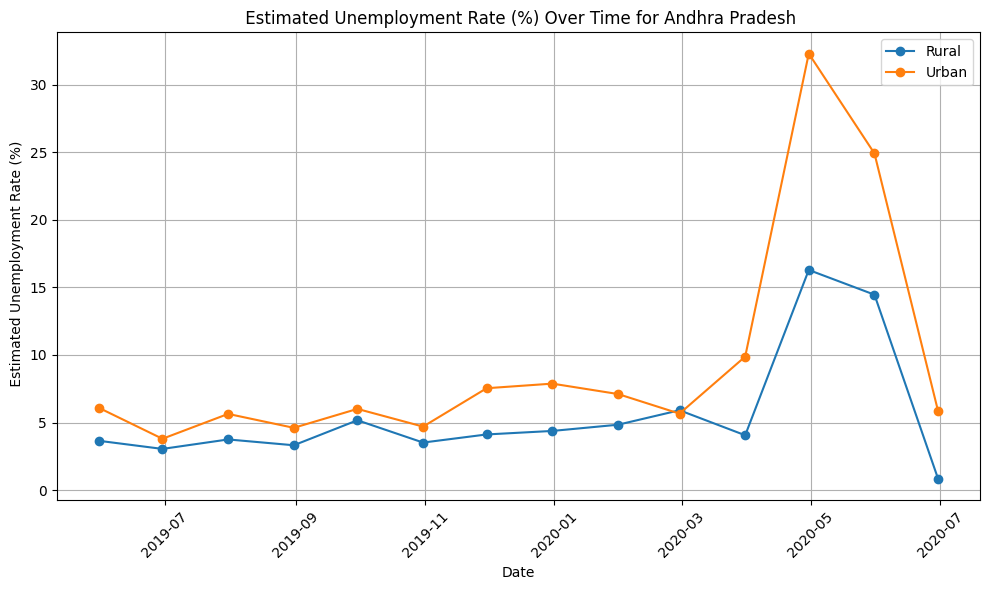

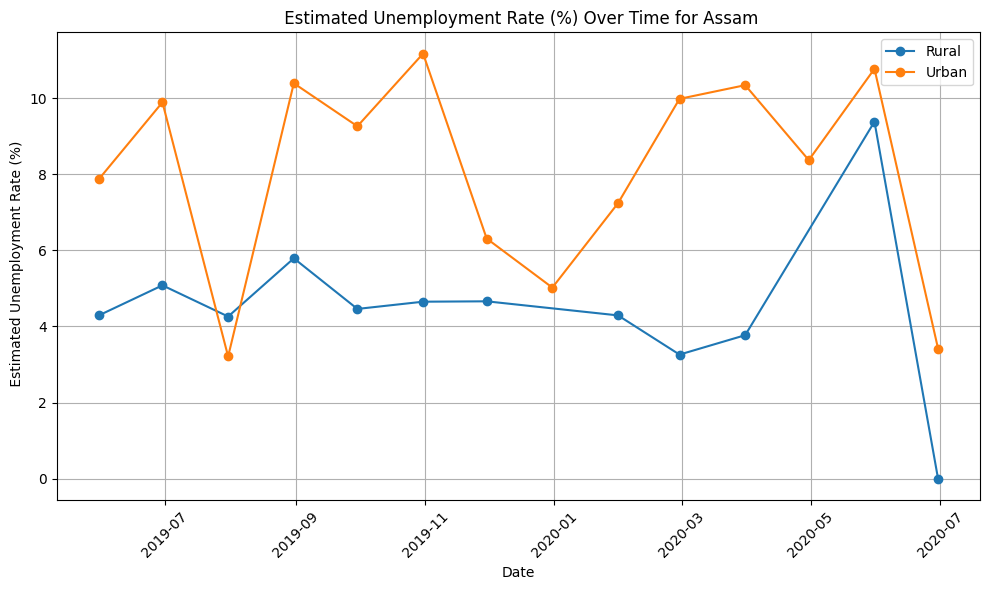

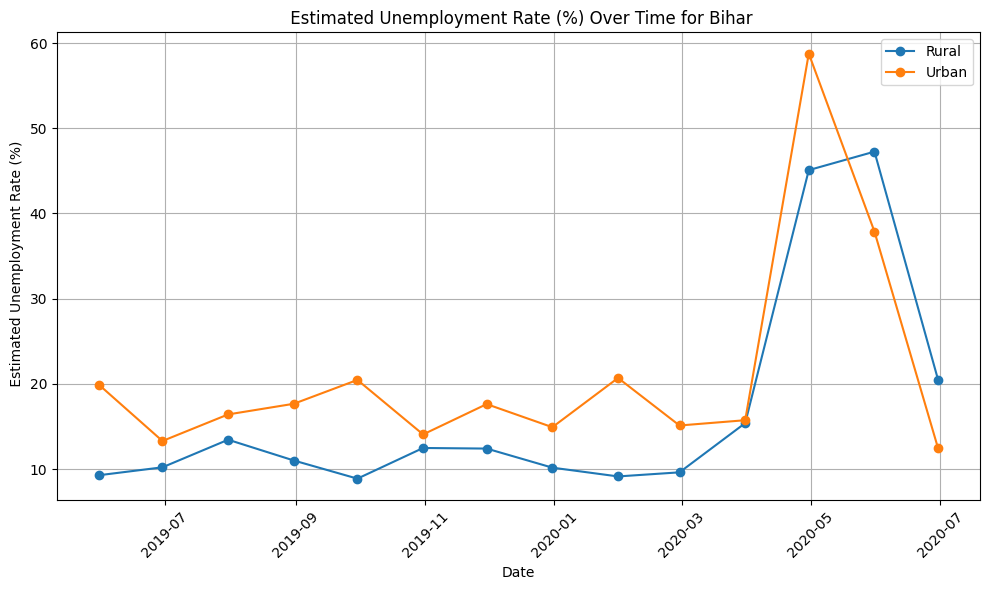

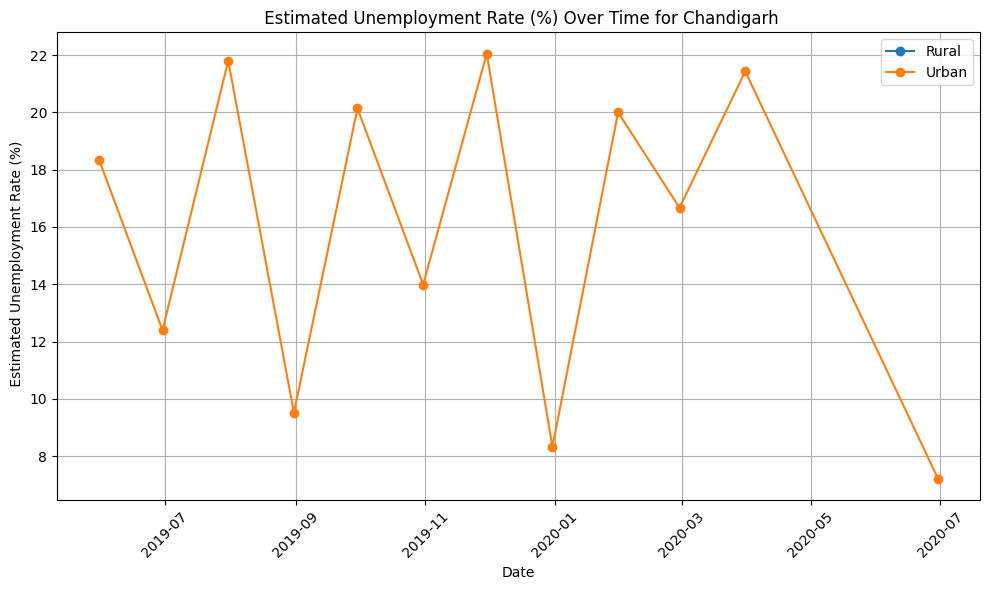

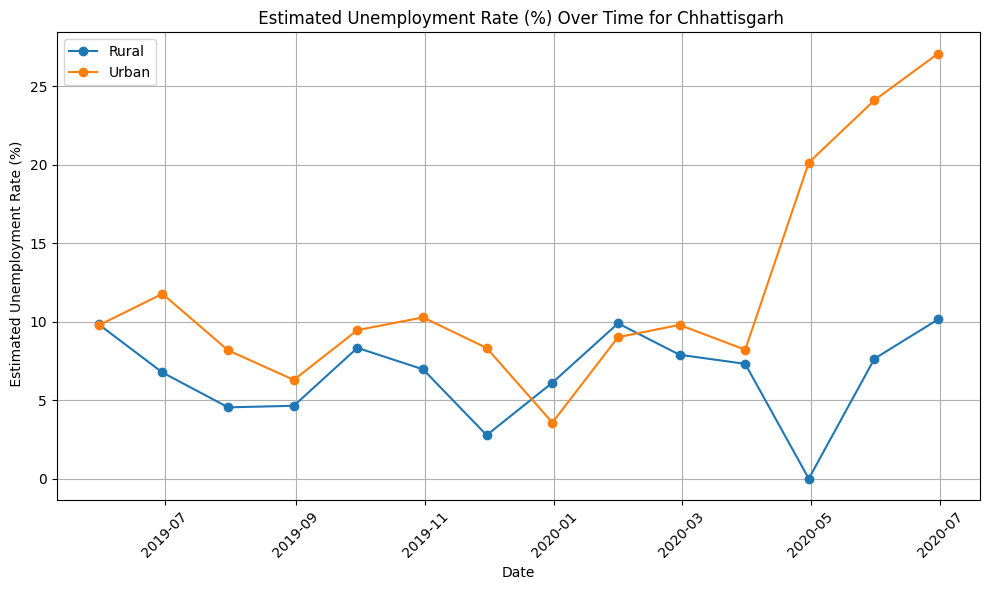

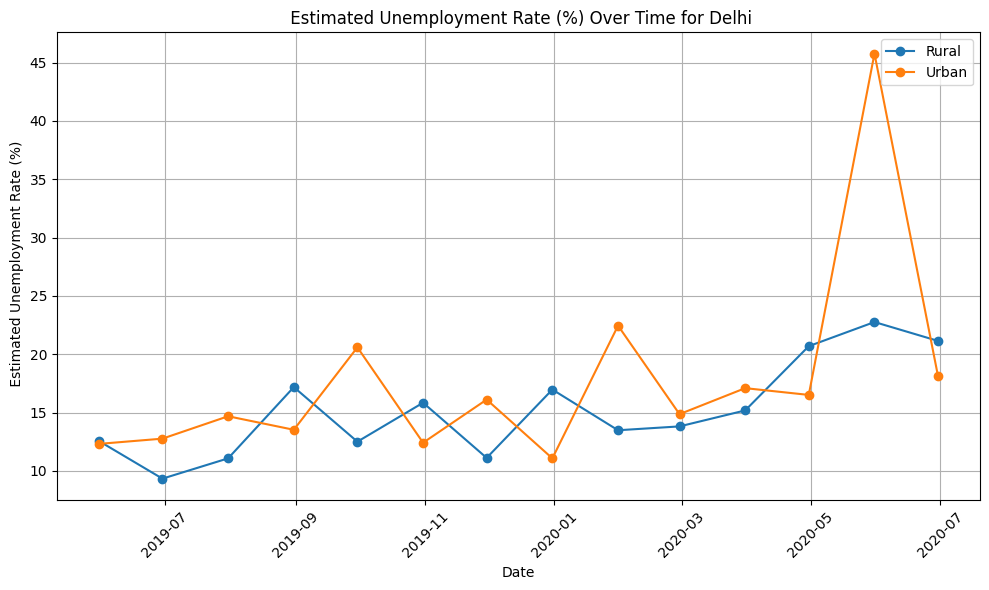

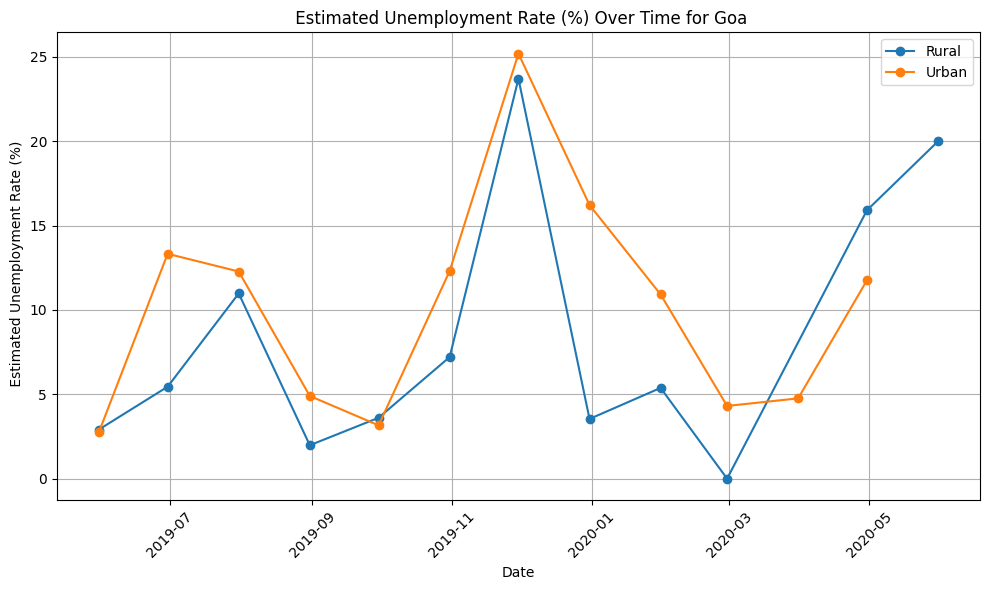

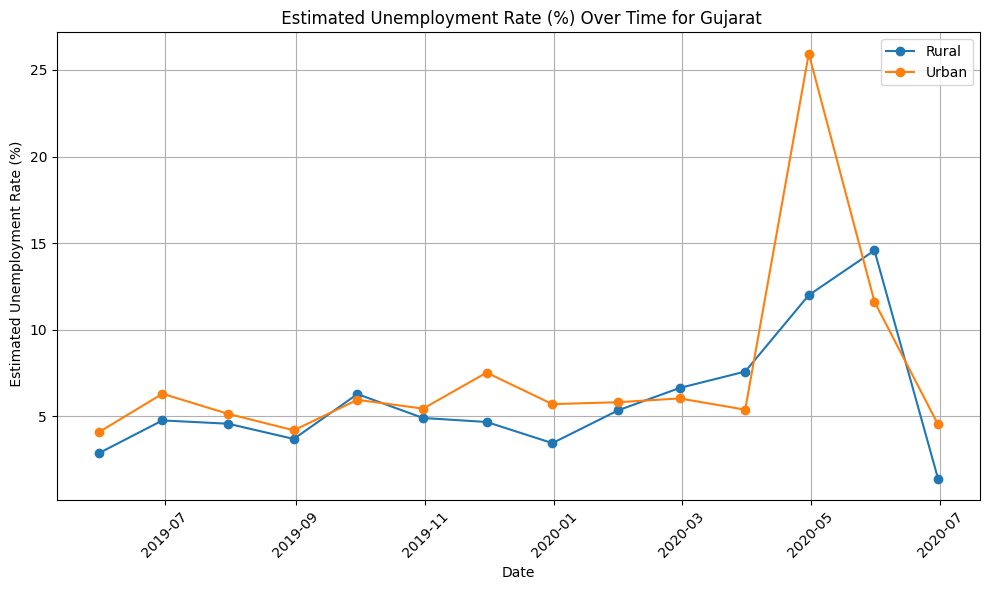

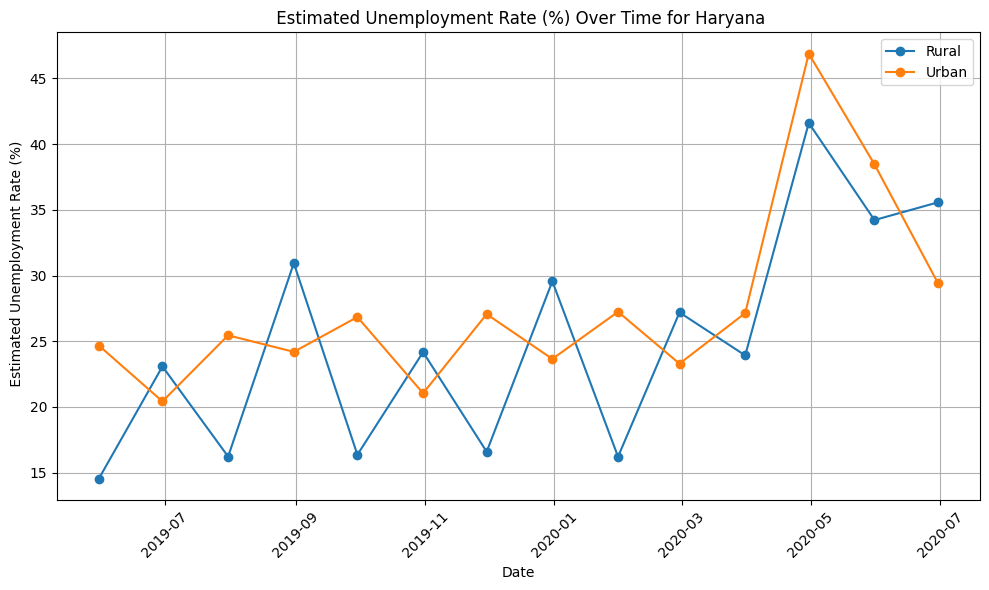

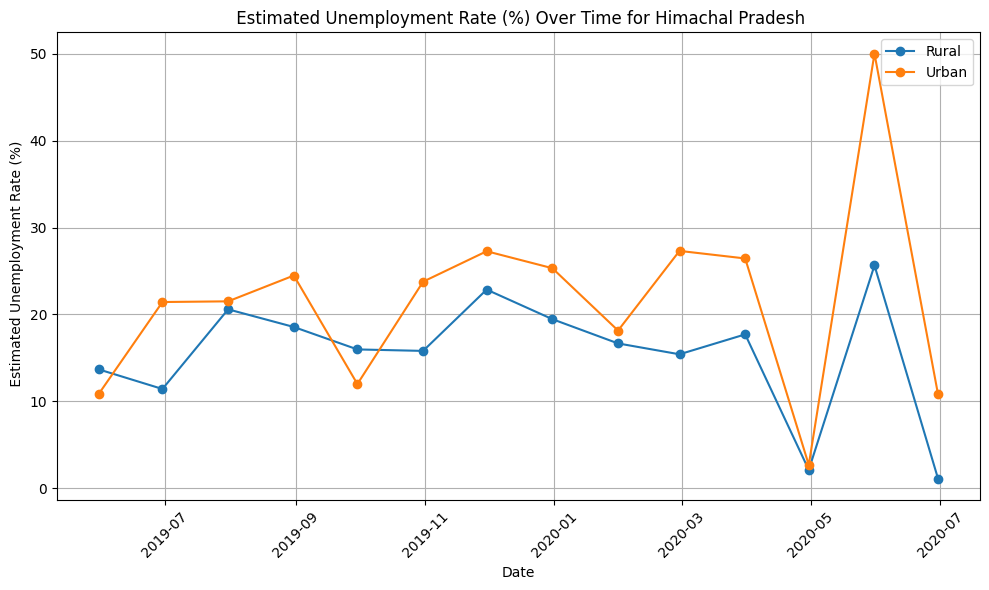

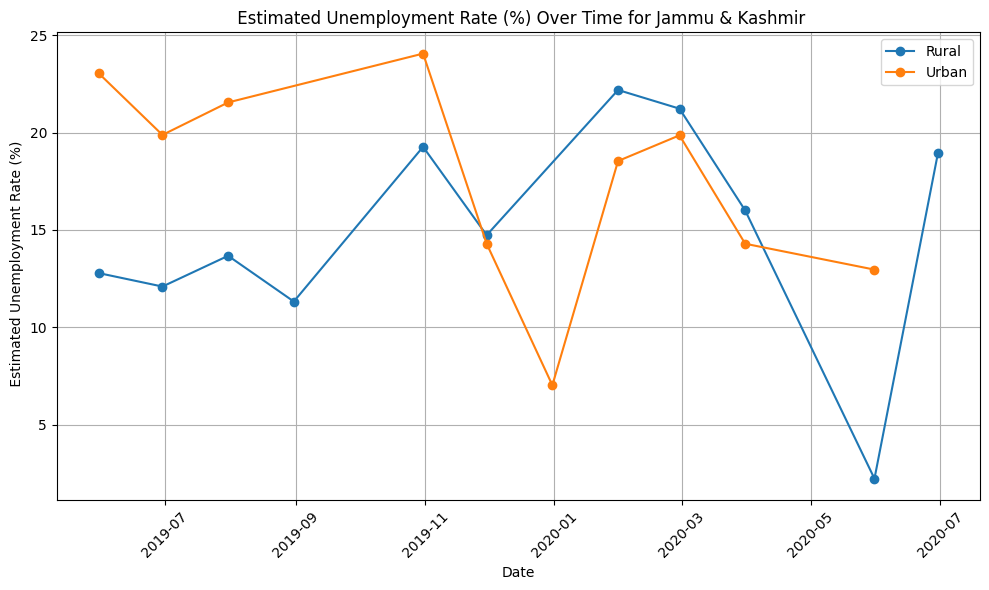

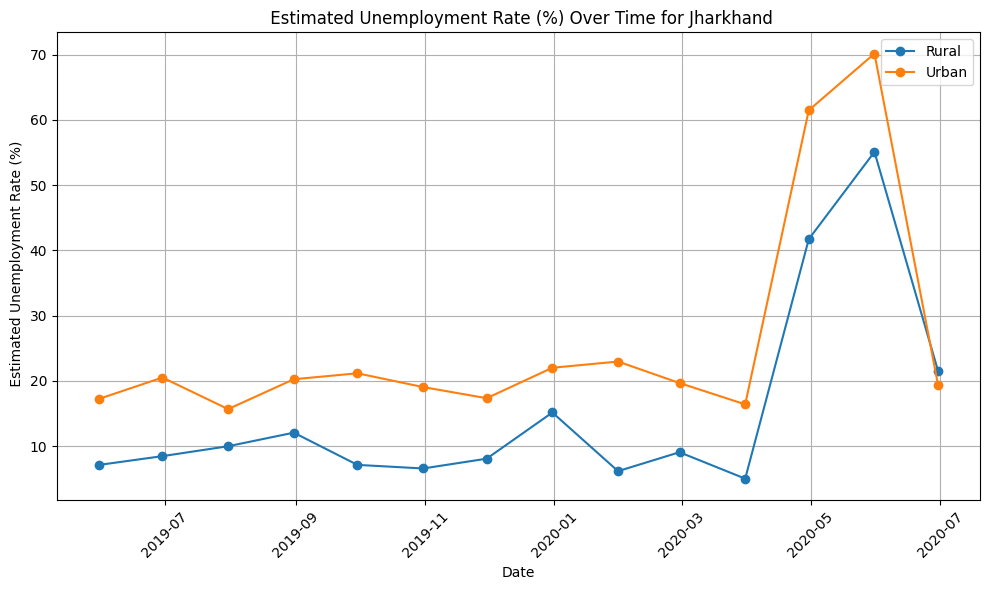

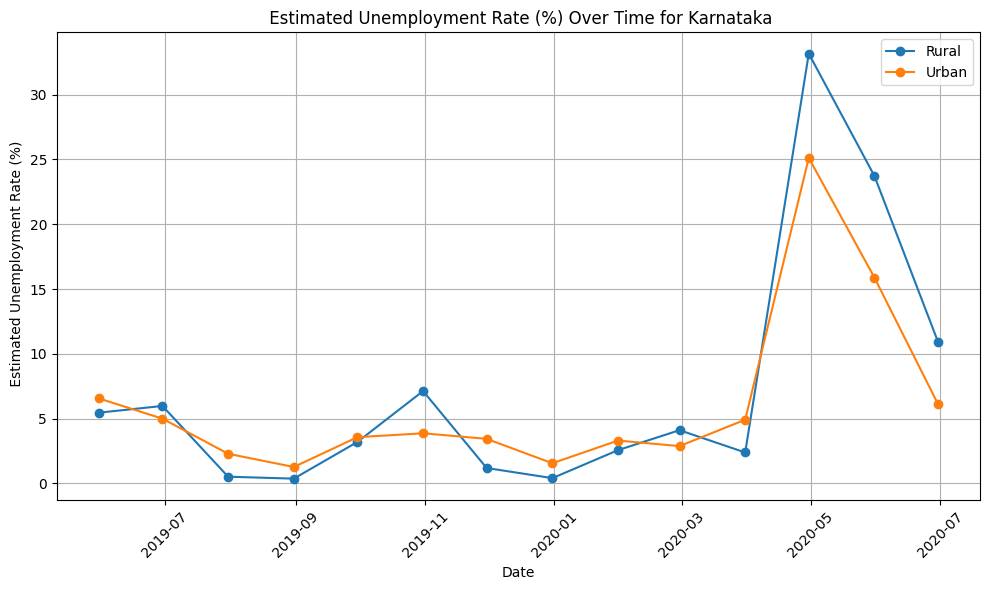

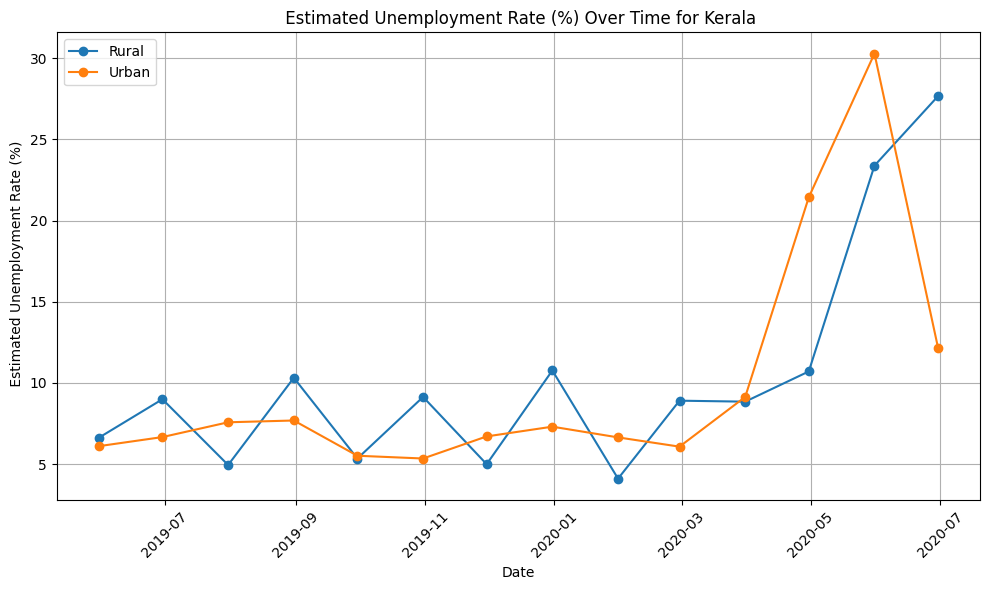

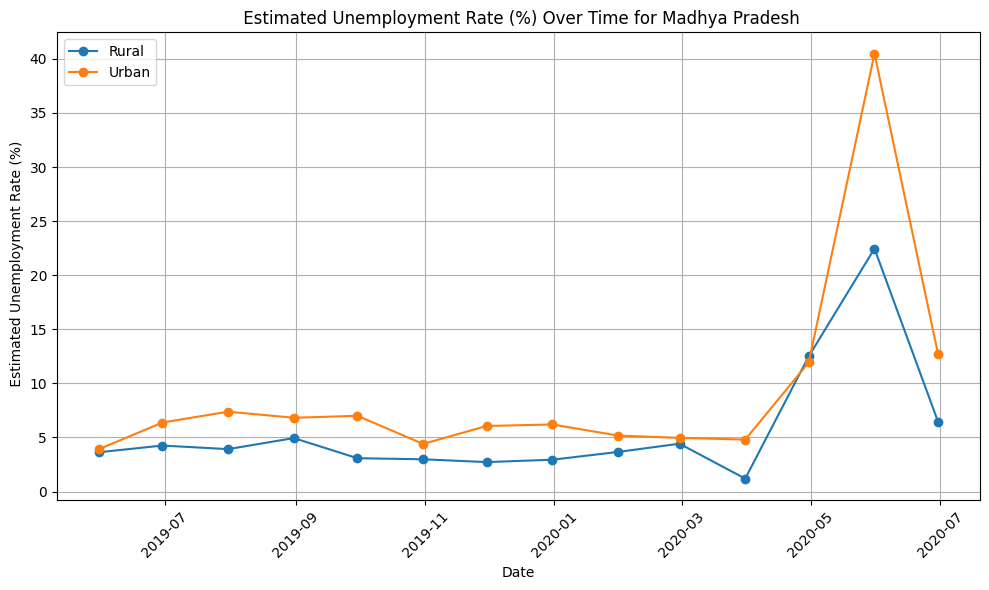

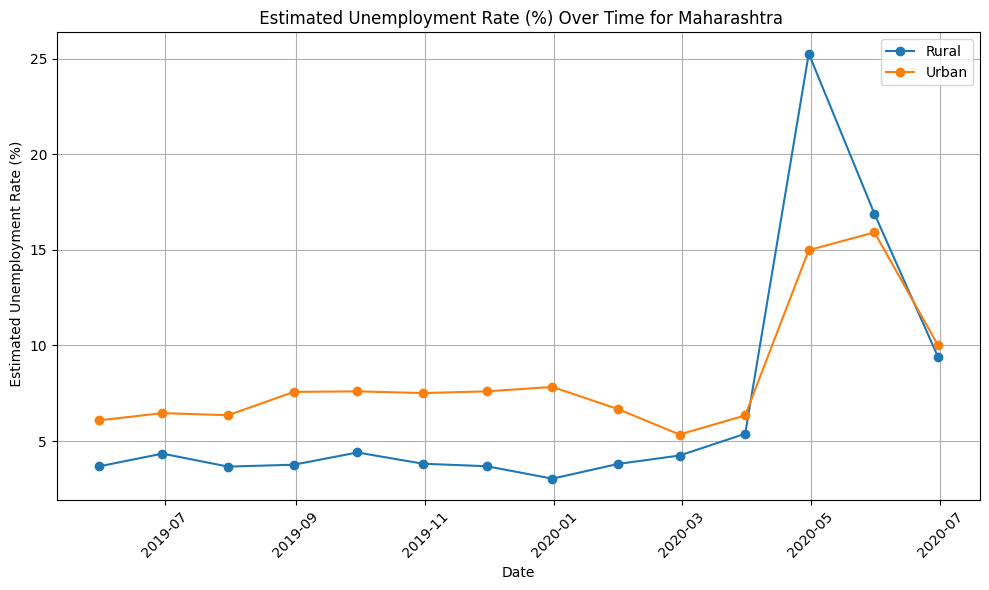

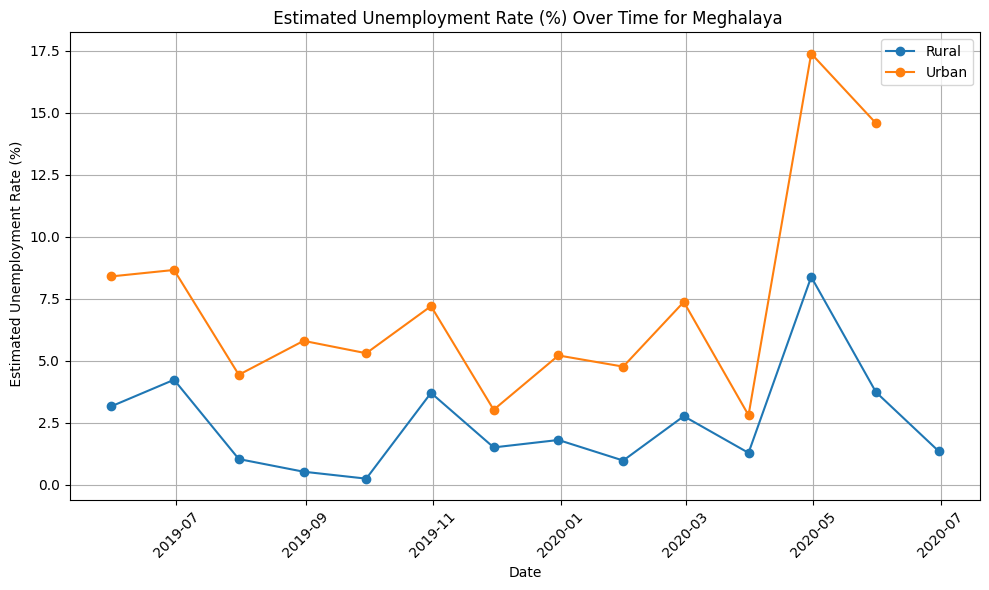

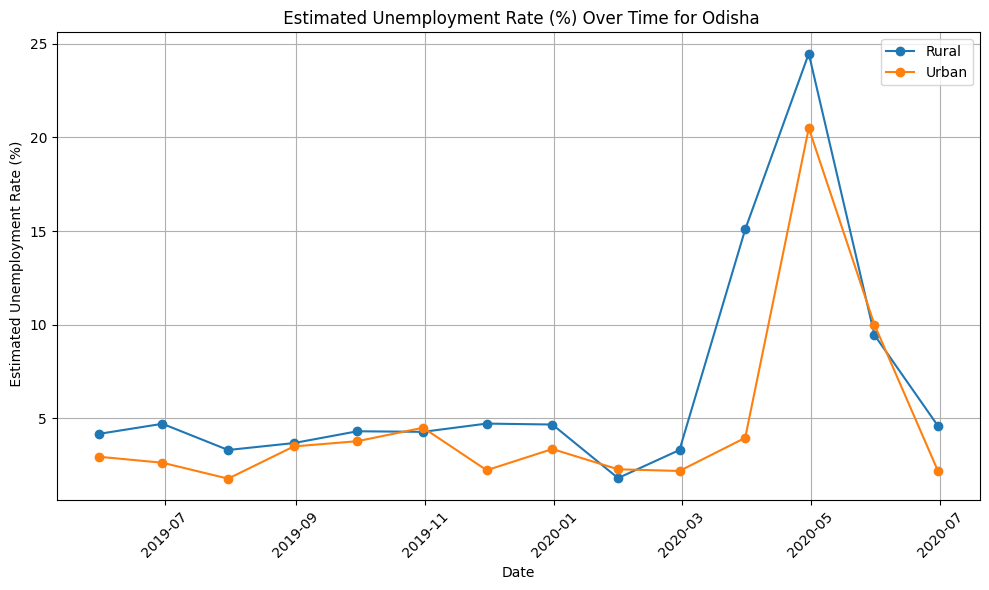

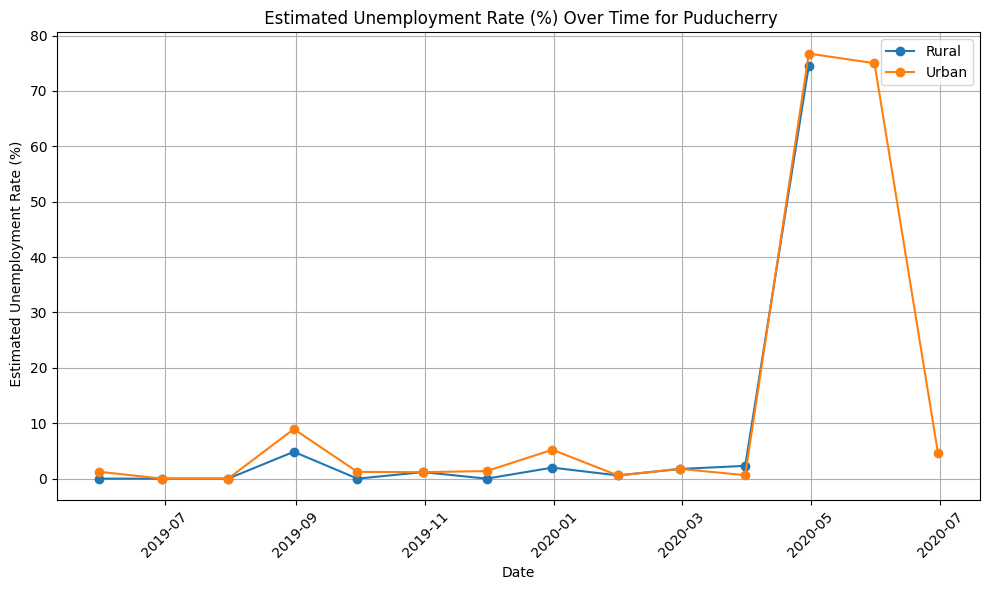

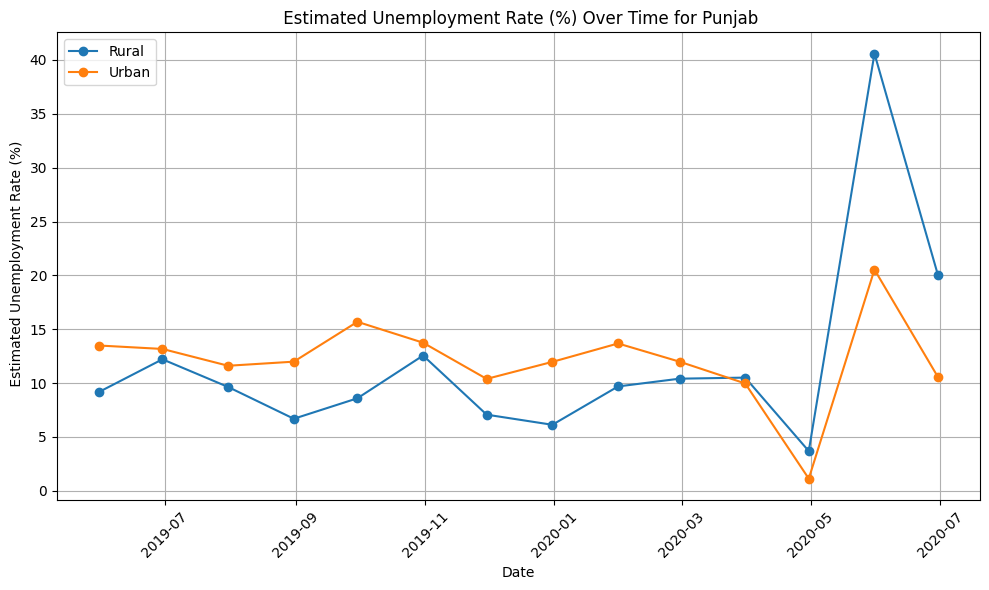

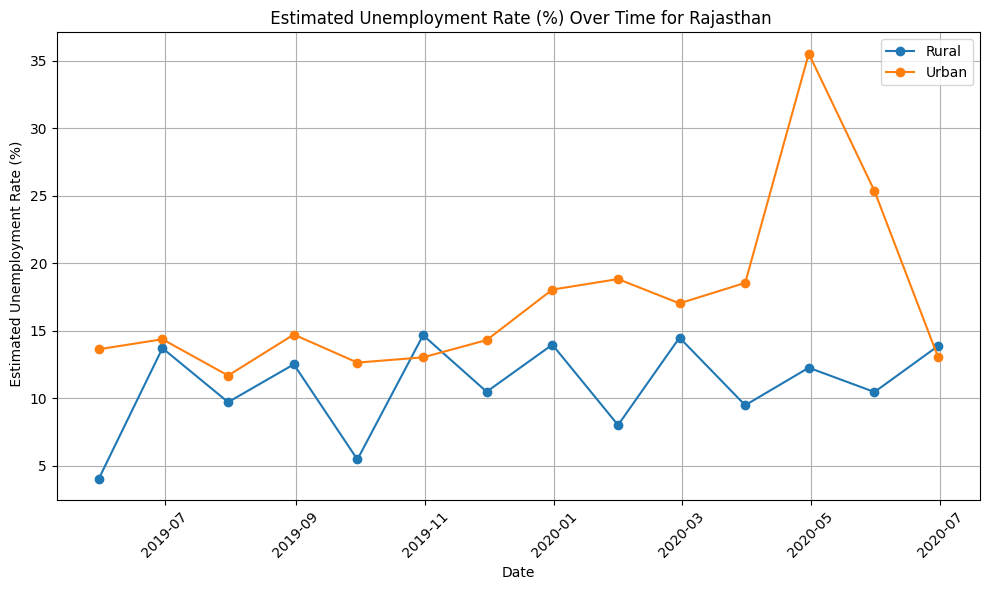

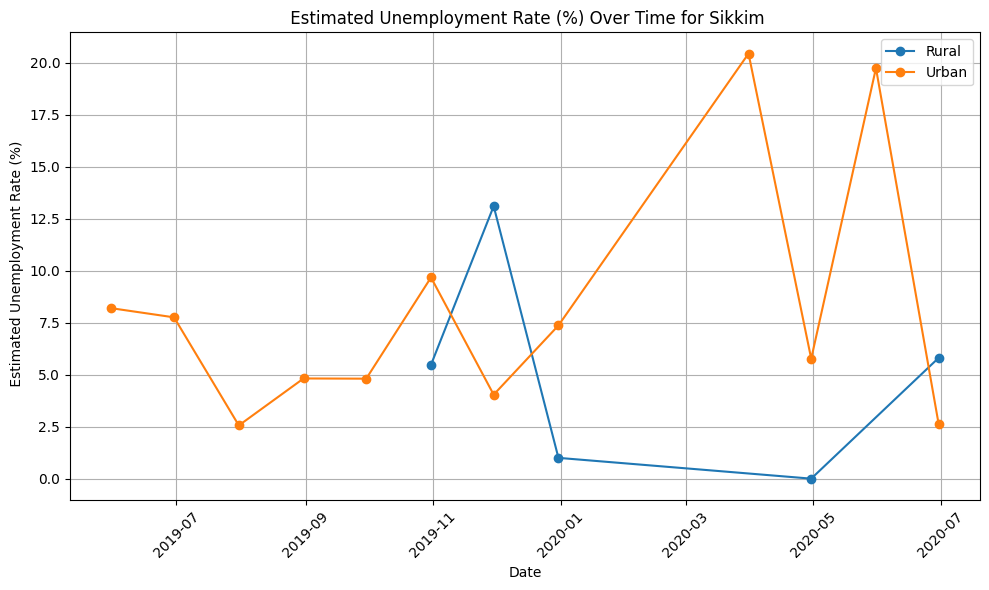

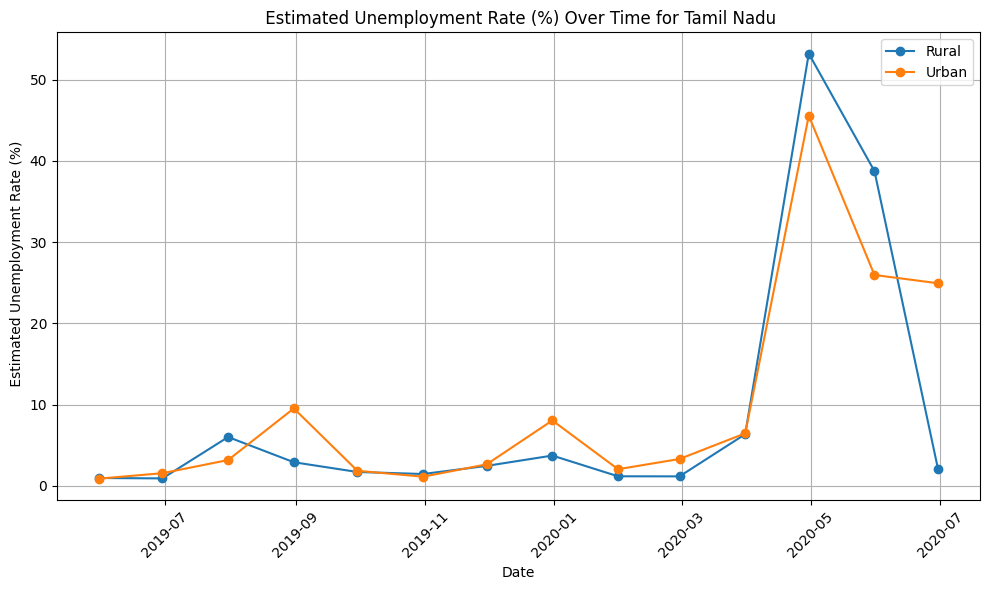

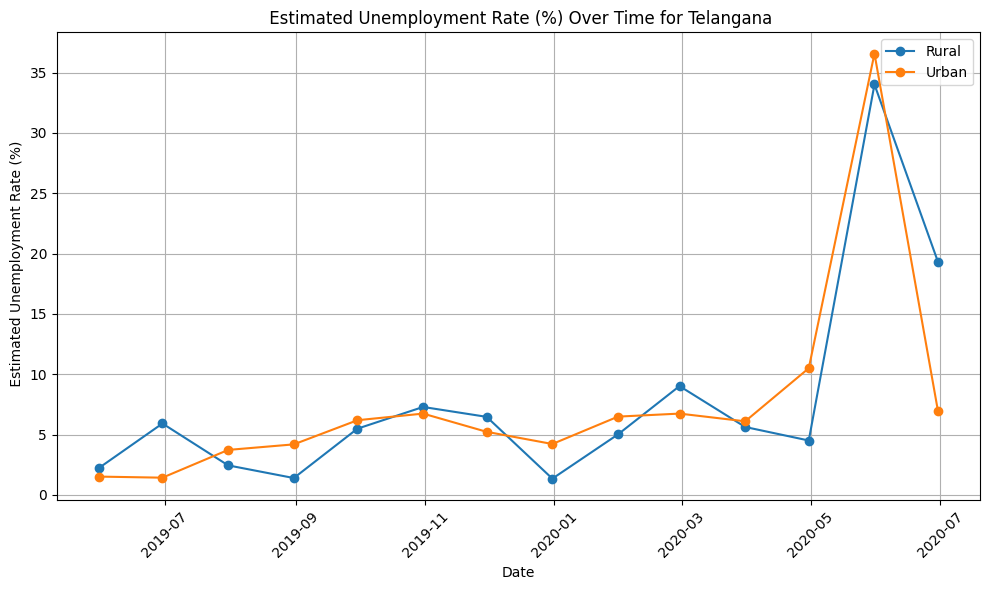

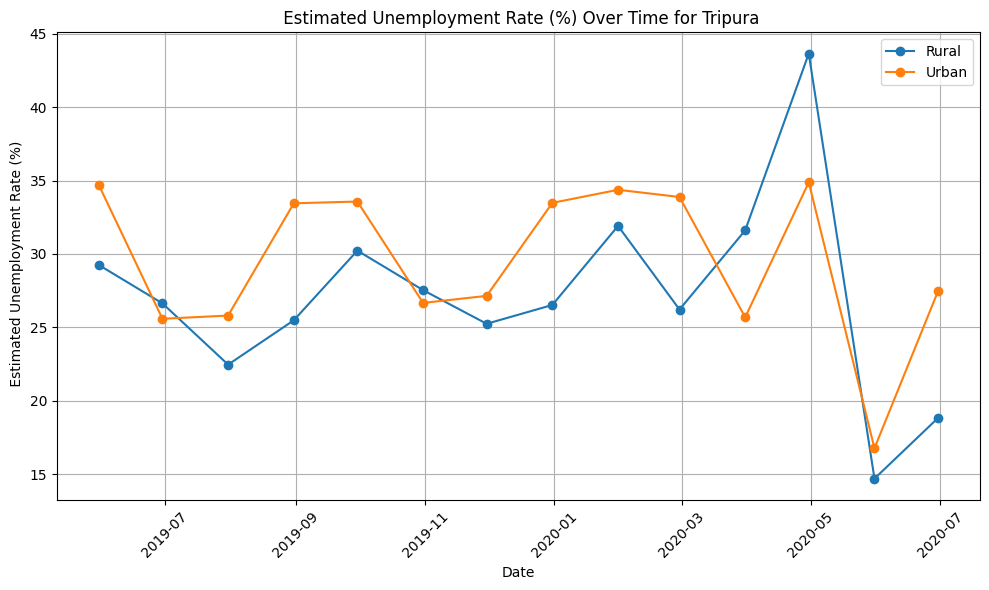

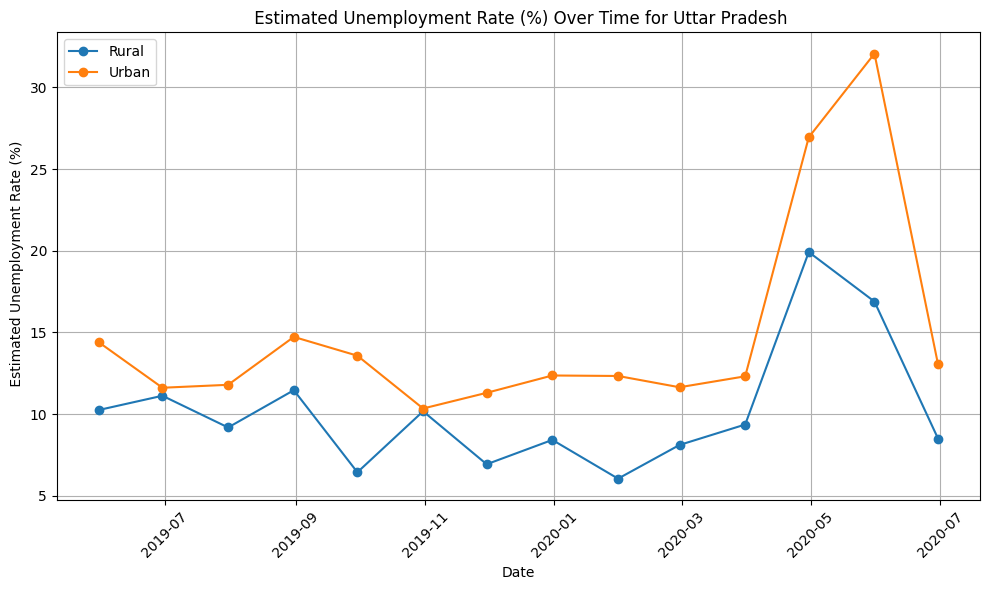

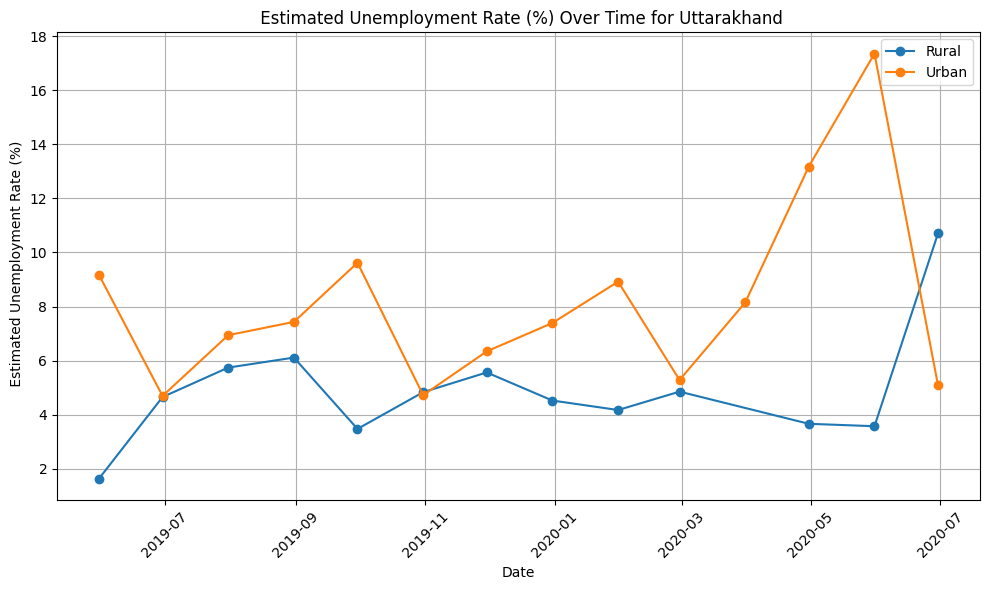

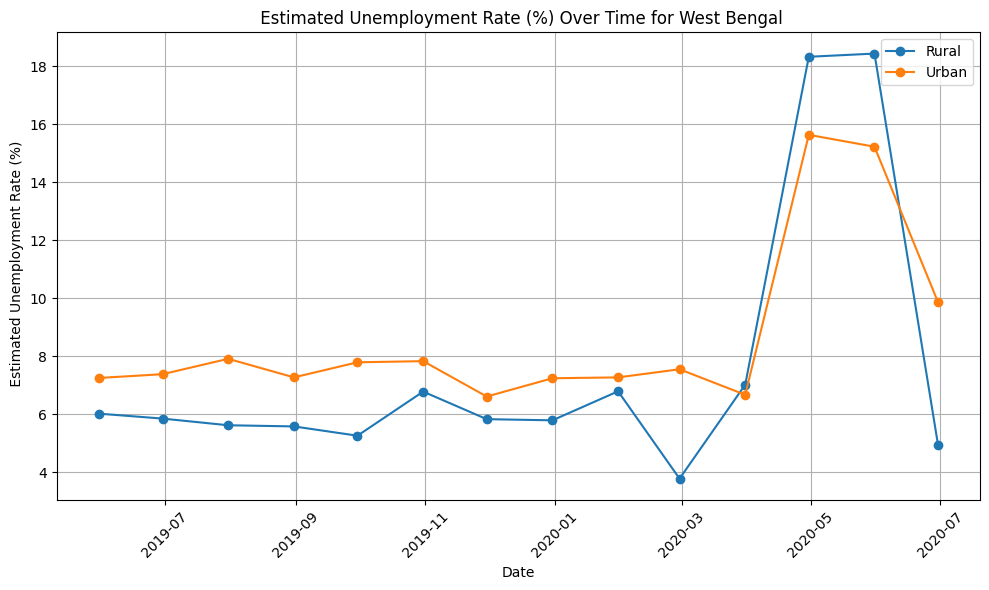

In [32]:
plot_rate_col_rate(grouped_df, ' Estimated Unemployment Rate (%)')

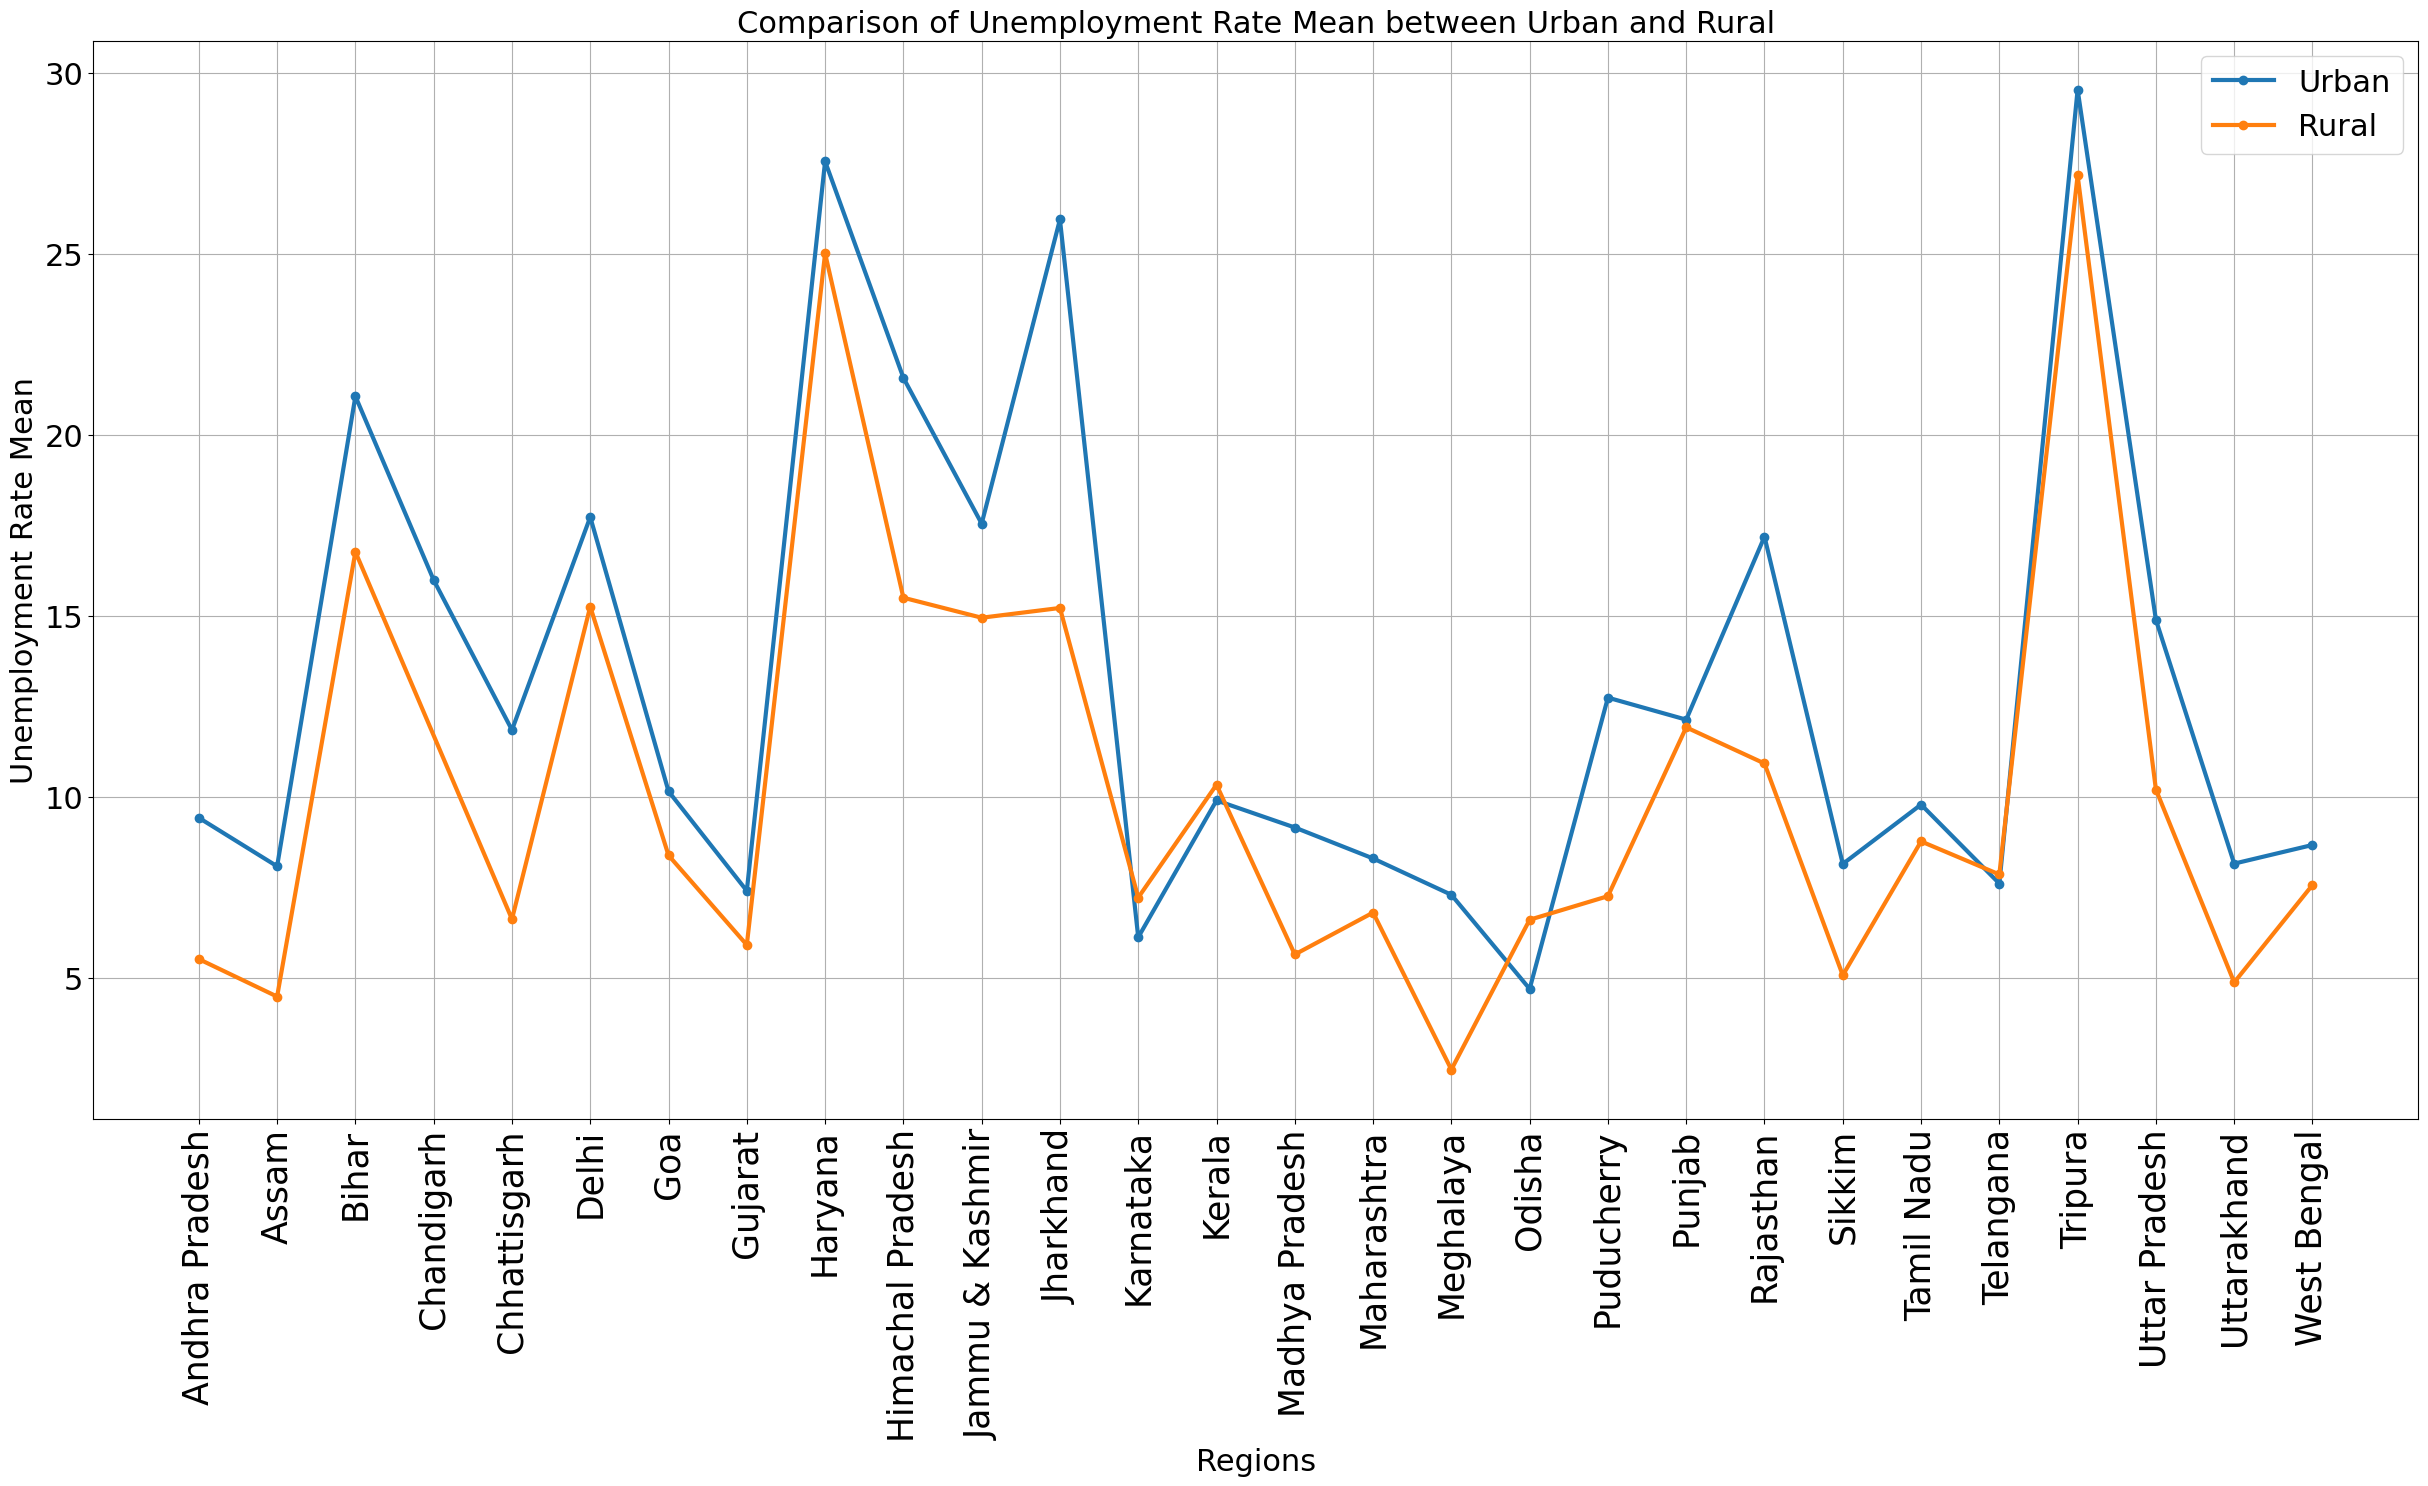

In [38]:
plot_comparison(urban_grouped_stats['Unemployment Rate Mean'], rural_grouped_stats['Unemployment Rate Mean'], 
                'Unemployment Rate Mean', 'Comparison of Unemployment Rate Mean between Urban and Rural')

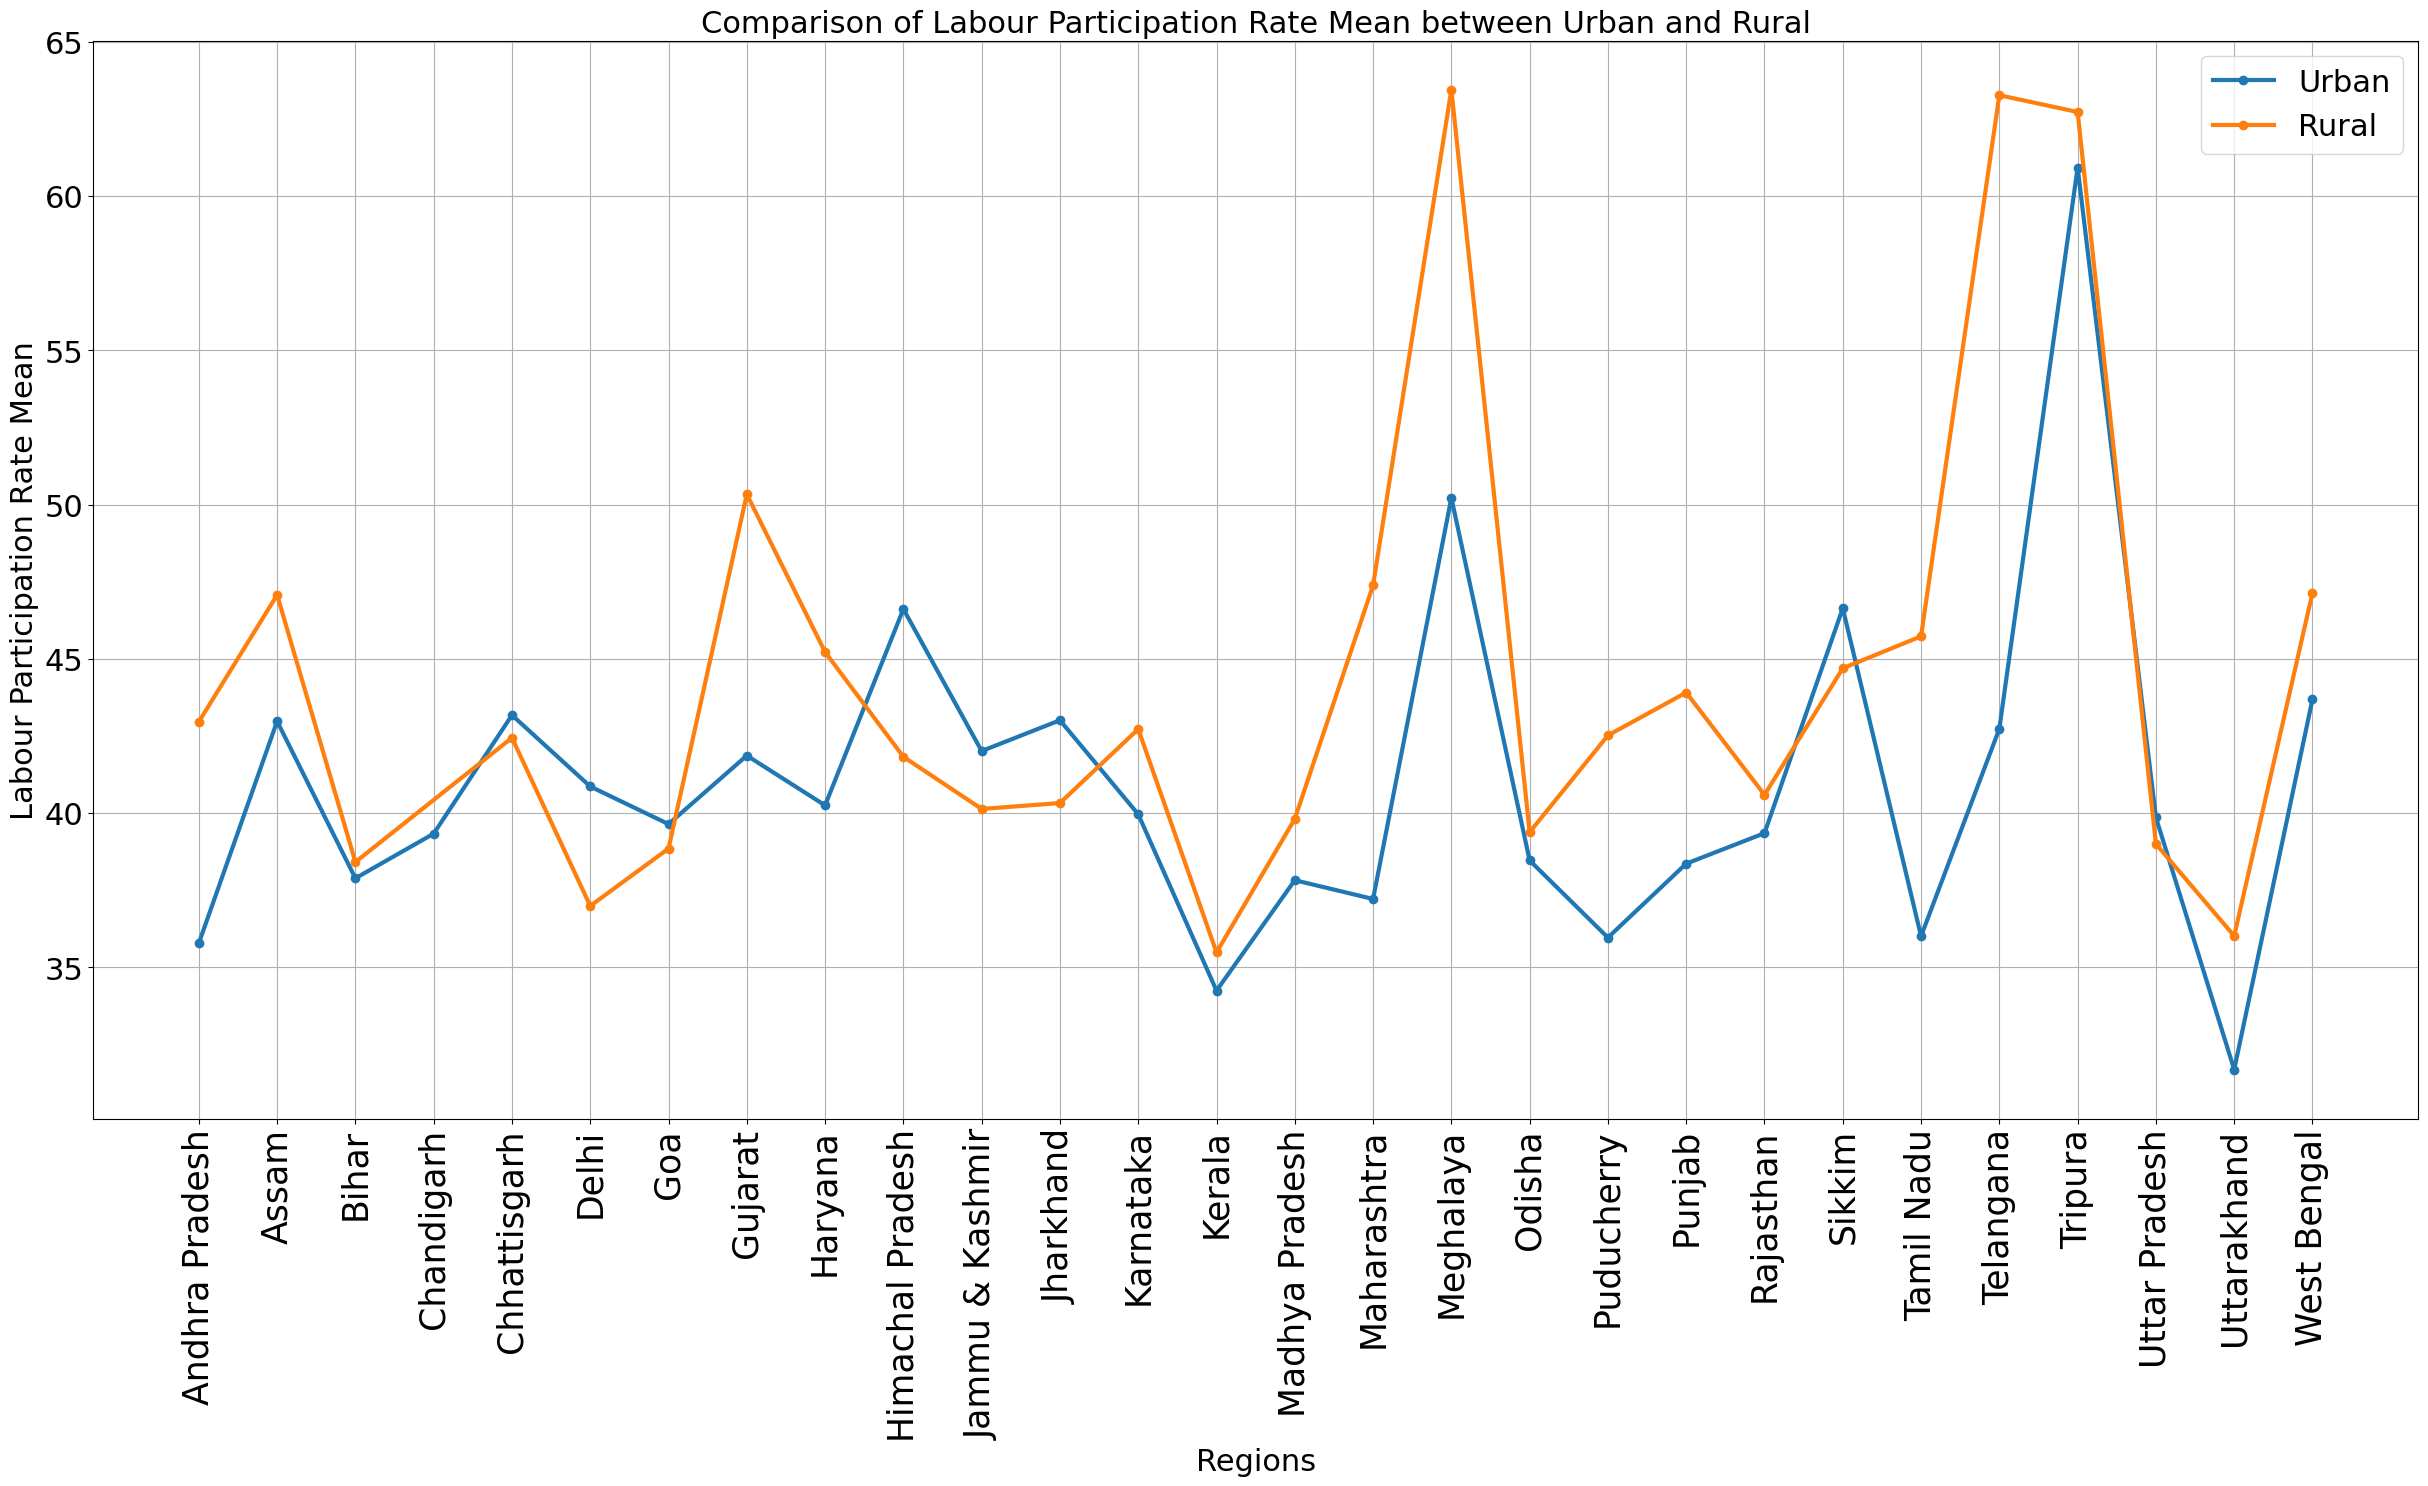

In [39]:
plot_comparison(urban_grouped_stats['Labour Participation Rate Mean'], rural_grouped_stats['Labour Participation Rate Mean'], 'Labour Participation Rate Mean', 'Comparison of Labour Participation Rate Mean between Urban and Rural')

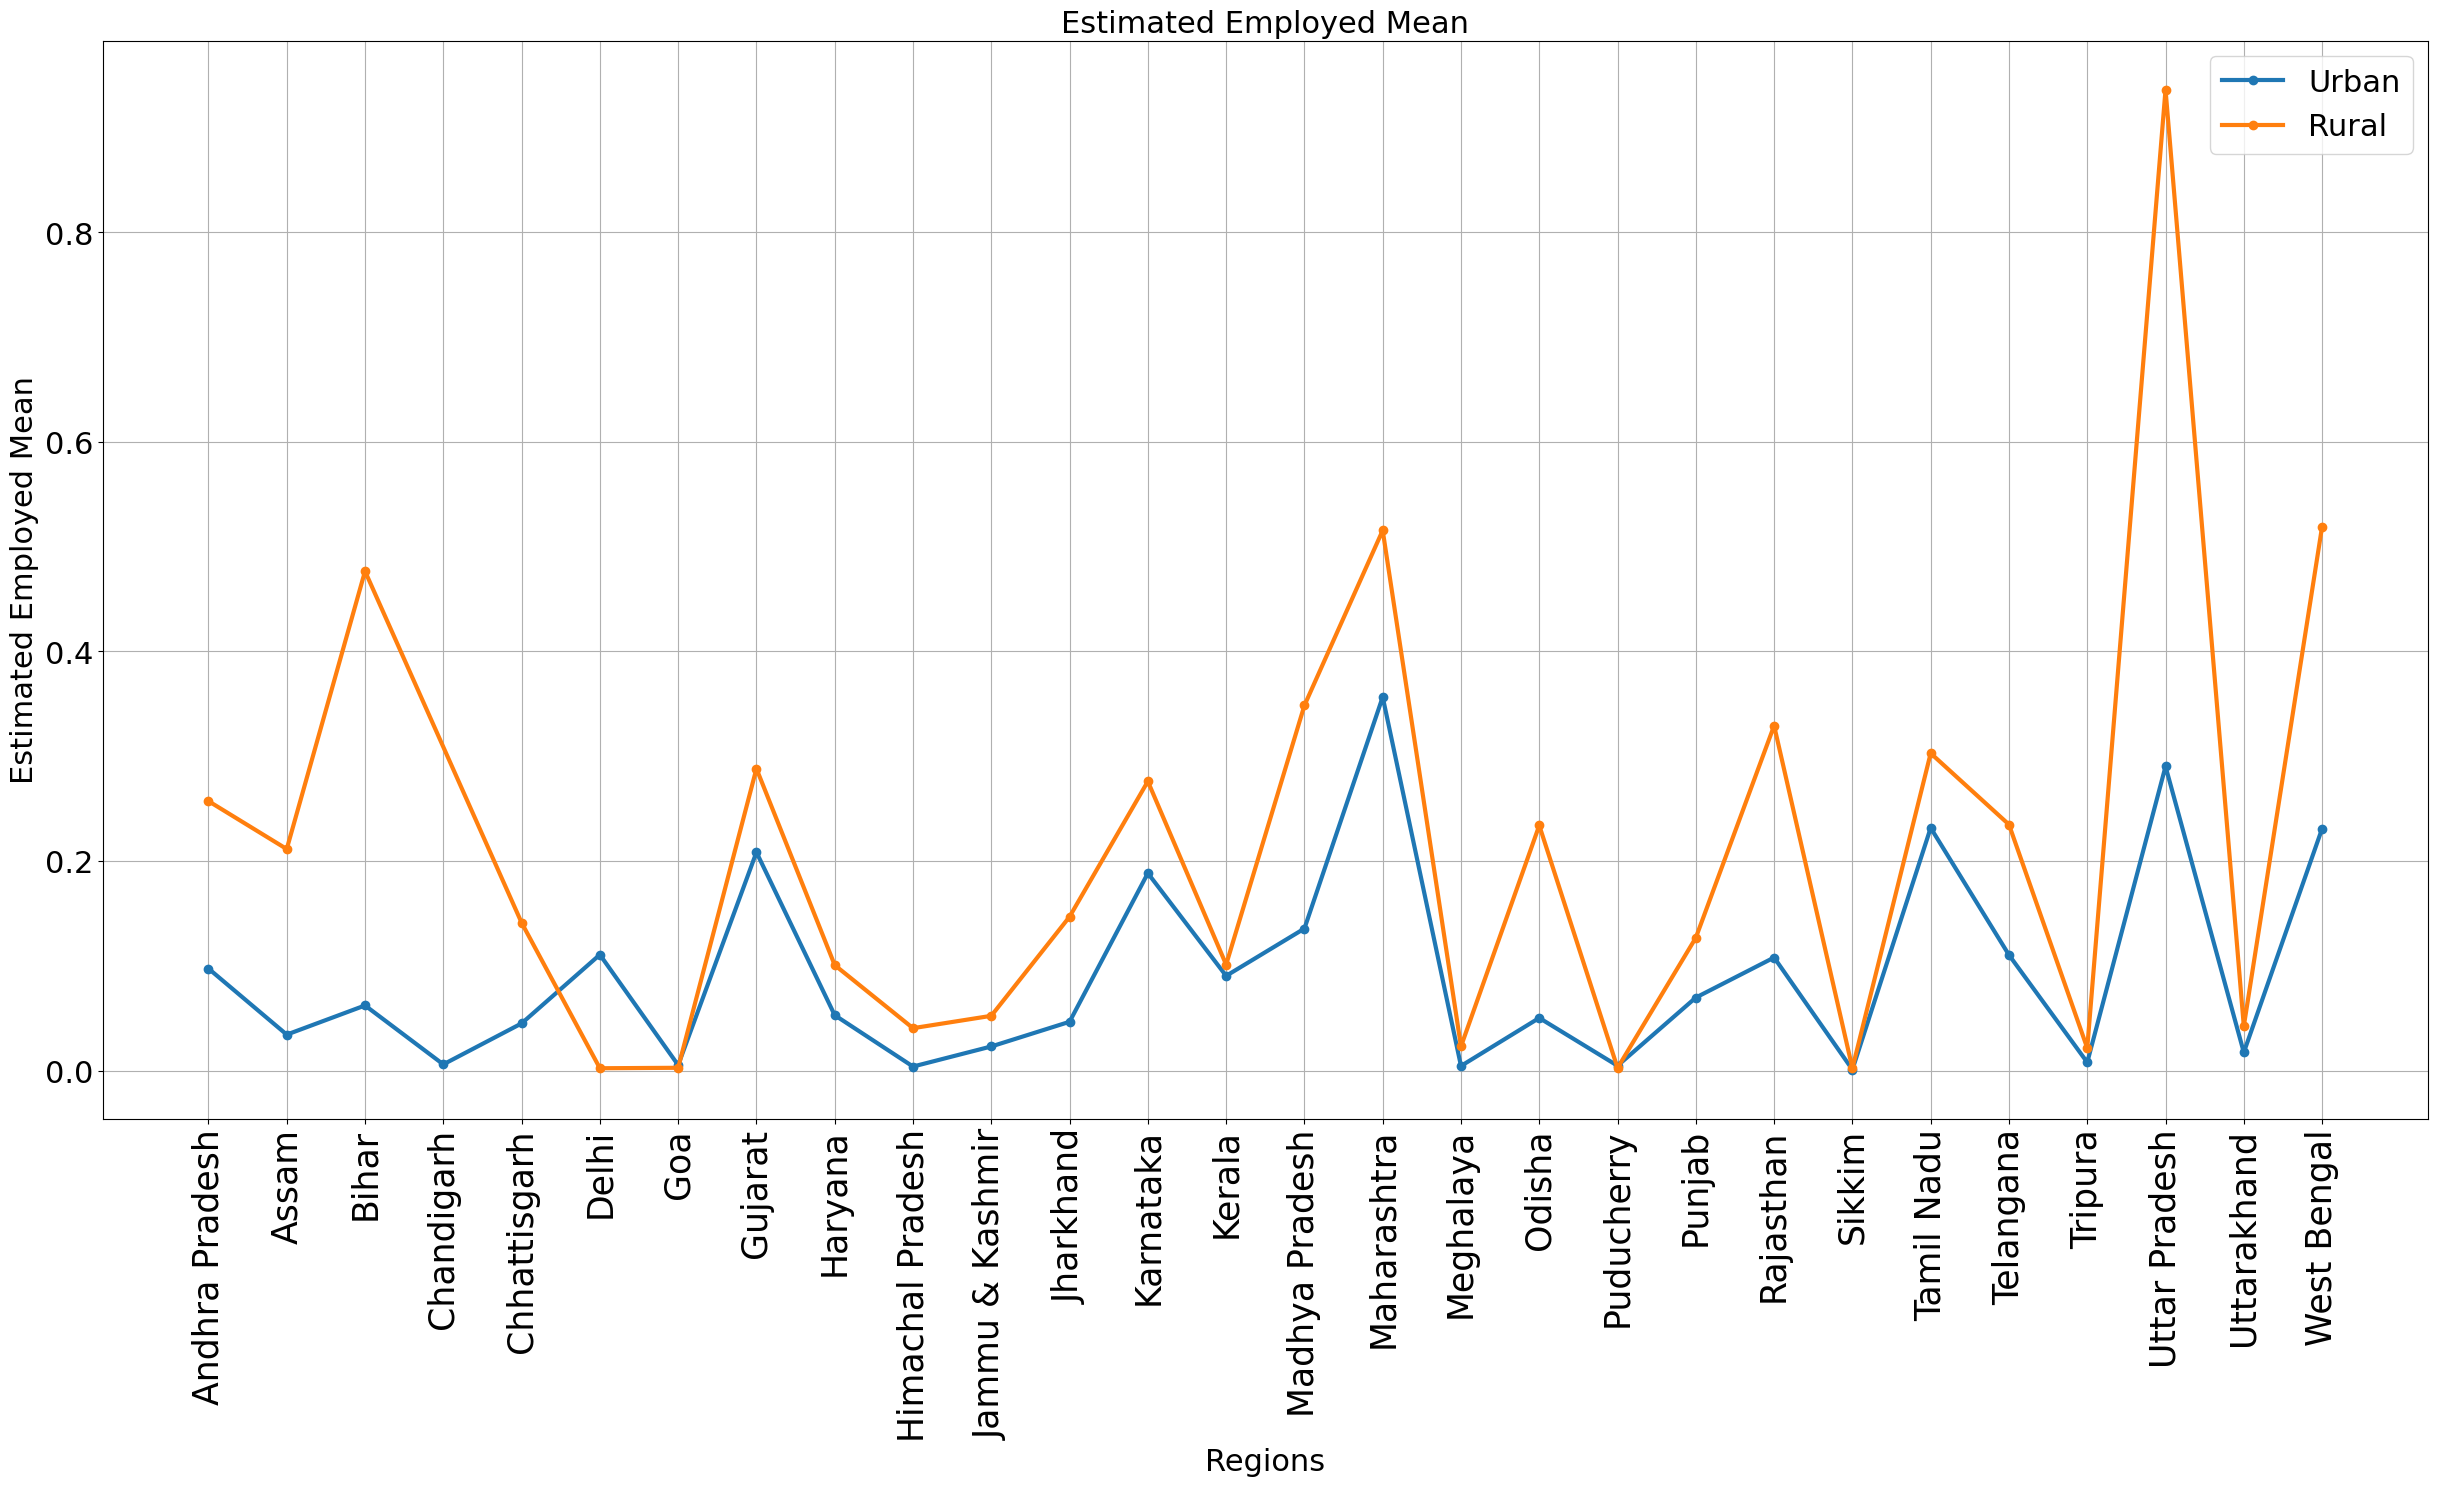

In [40]:
plot_comparison(urban_grouped_stats['Estimated Employed Mean'], 
                rural_grouped_stats['Estimated Employed Mean'], 
                'Estimated Employed Mean', 
                'Estimated Employed Mean')

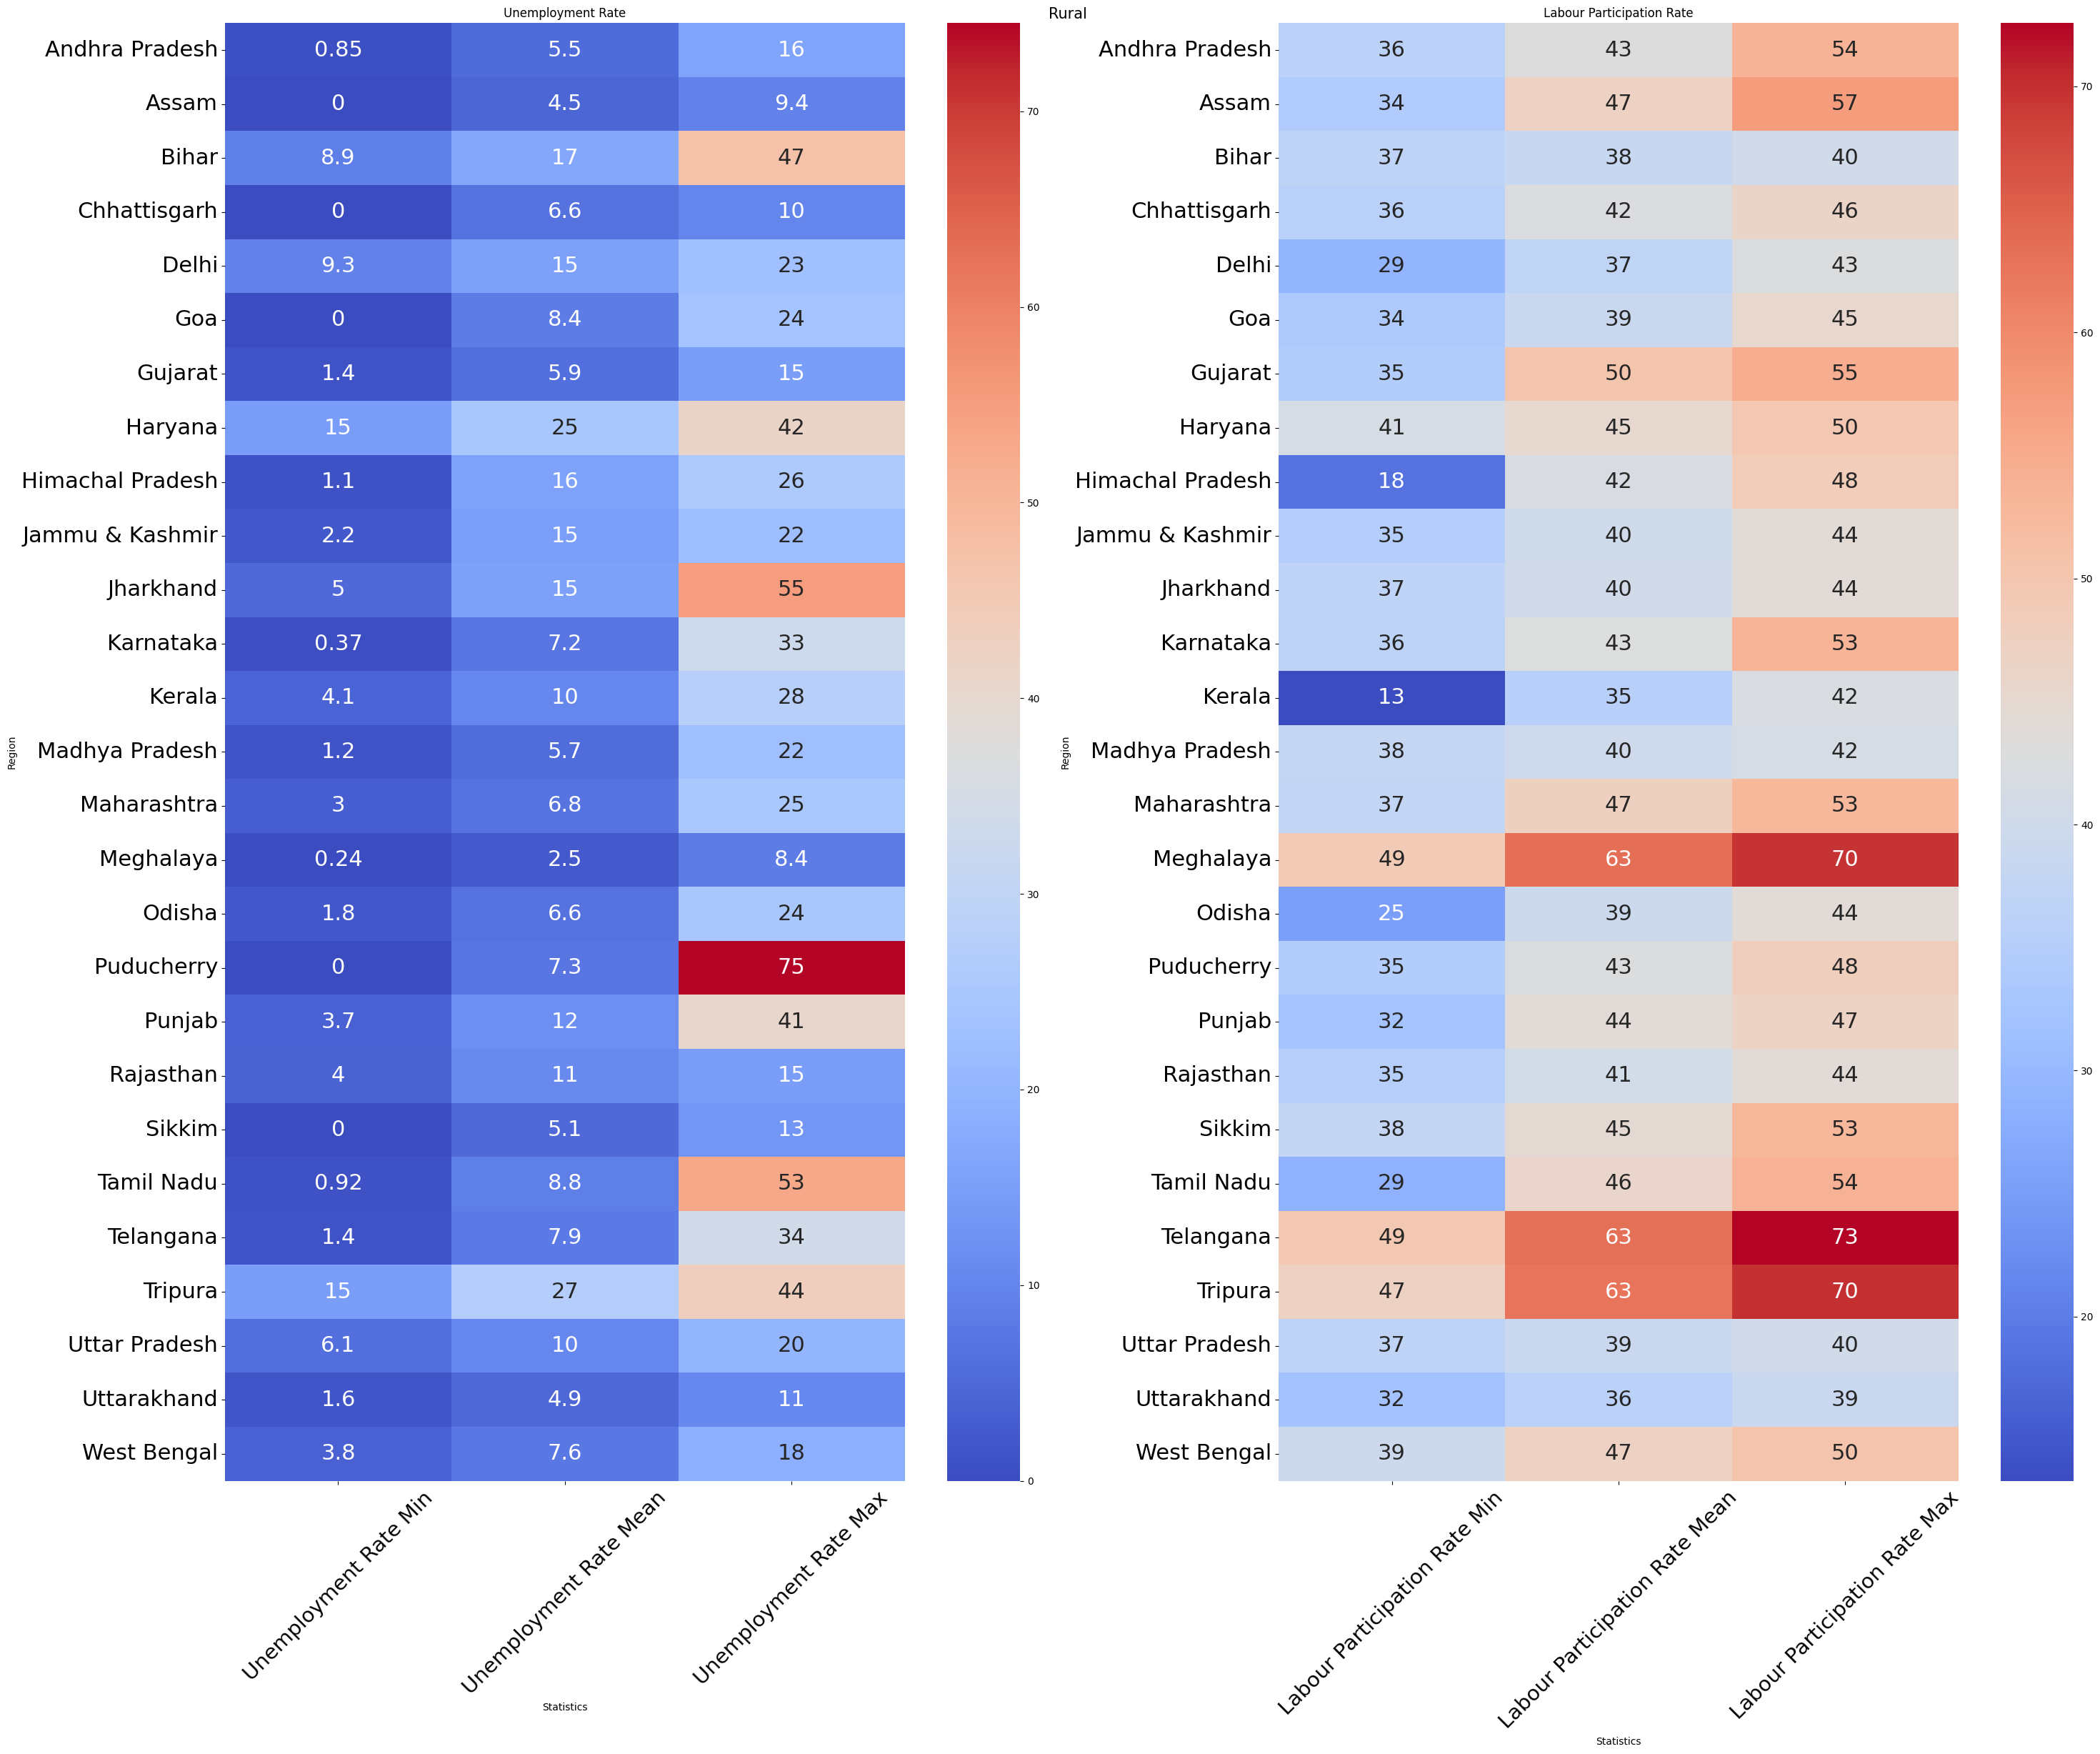

In [45]:
heat_plots(rural_grouped_stats, 'Rural')

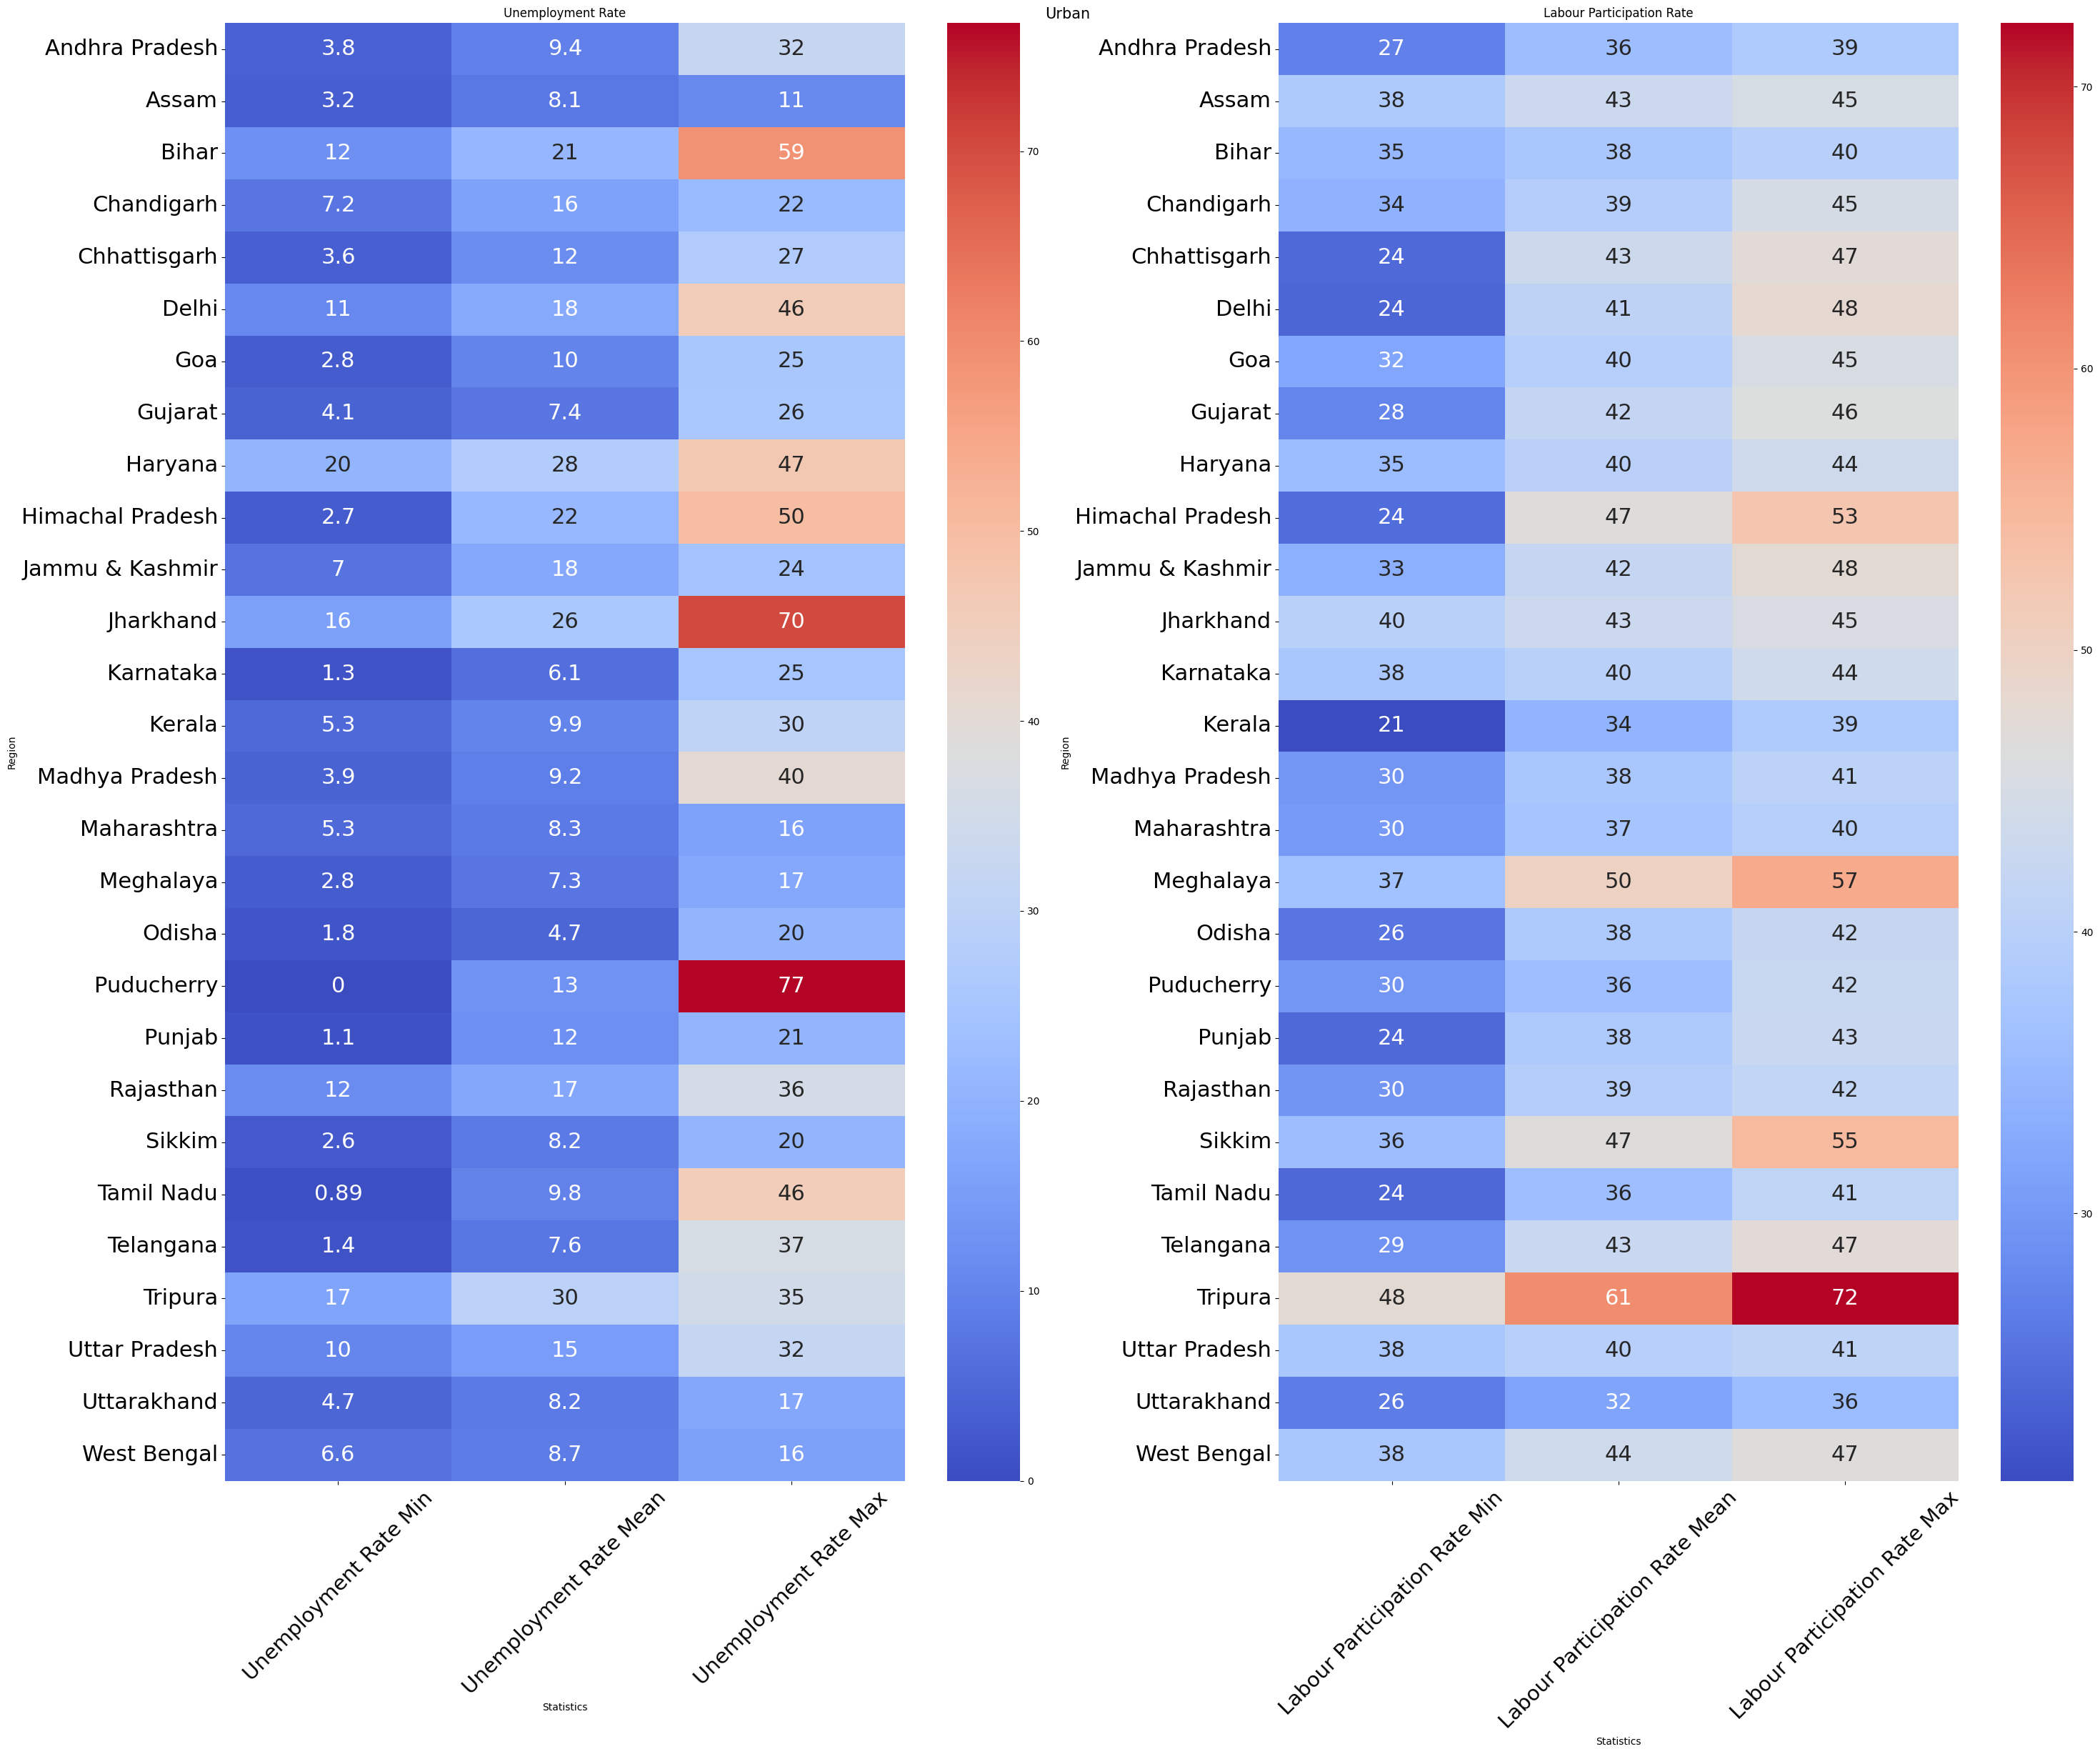

In [46]:
heat_plots(urban_grouped_stats, 'Urban')

In [48]:
rural_grouped_stats['Covid19 Unemployment Rate Effect'] = rural_grouped_stats['Unemployment Rate Std'] * rural_grouped_stats['Estimated Employed Mean']
urban_grouped_stats['Covid19 Unemployment Rate Effect'] = urban_grouped_stats['Unemployment Rate Std'] * urban_grouped_stats['Estimated Employed Mean']

rural_grouped_stats['Covid19 Labour Participation Rate Effect'] = rural_grouped_stats['Labour Participation Rate Std'] * rural_grouped_stats['Estimated Employed Mean']
urban_grouped_stats['Covid19 Labour Participation Rate Effect'] = urban_grouped_stats['Labour Participation Rate Std'] * urban_grouped_stats['Estimated Employed Mean']

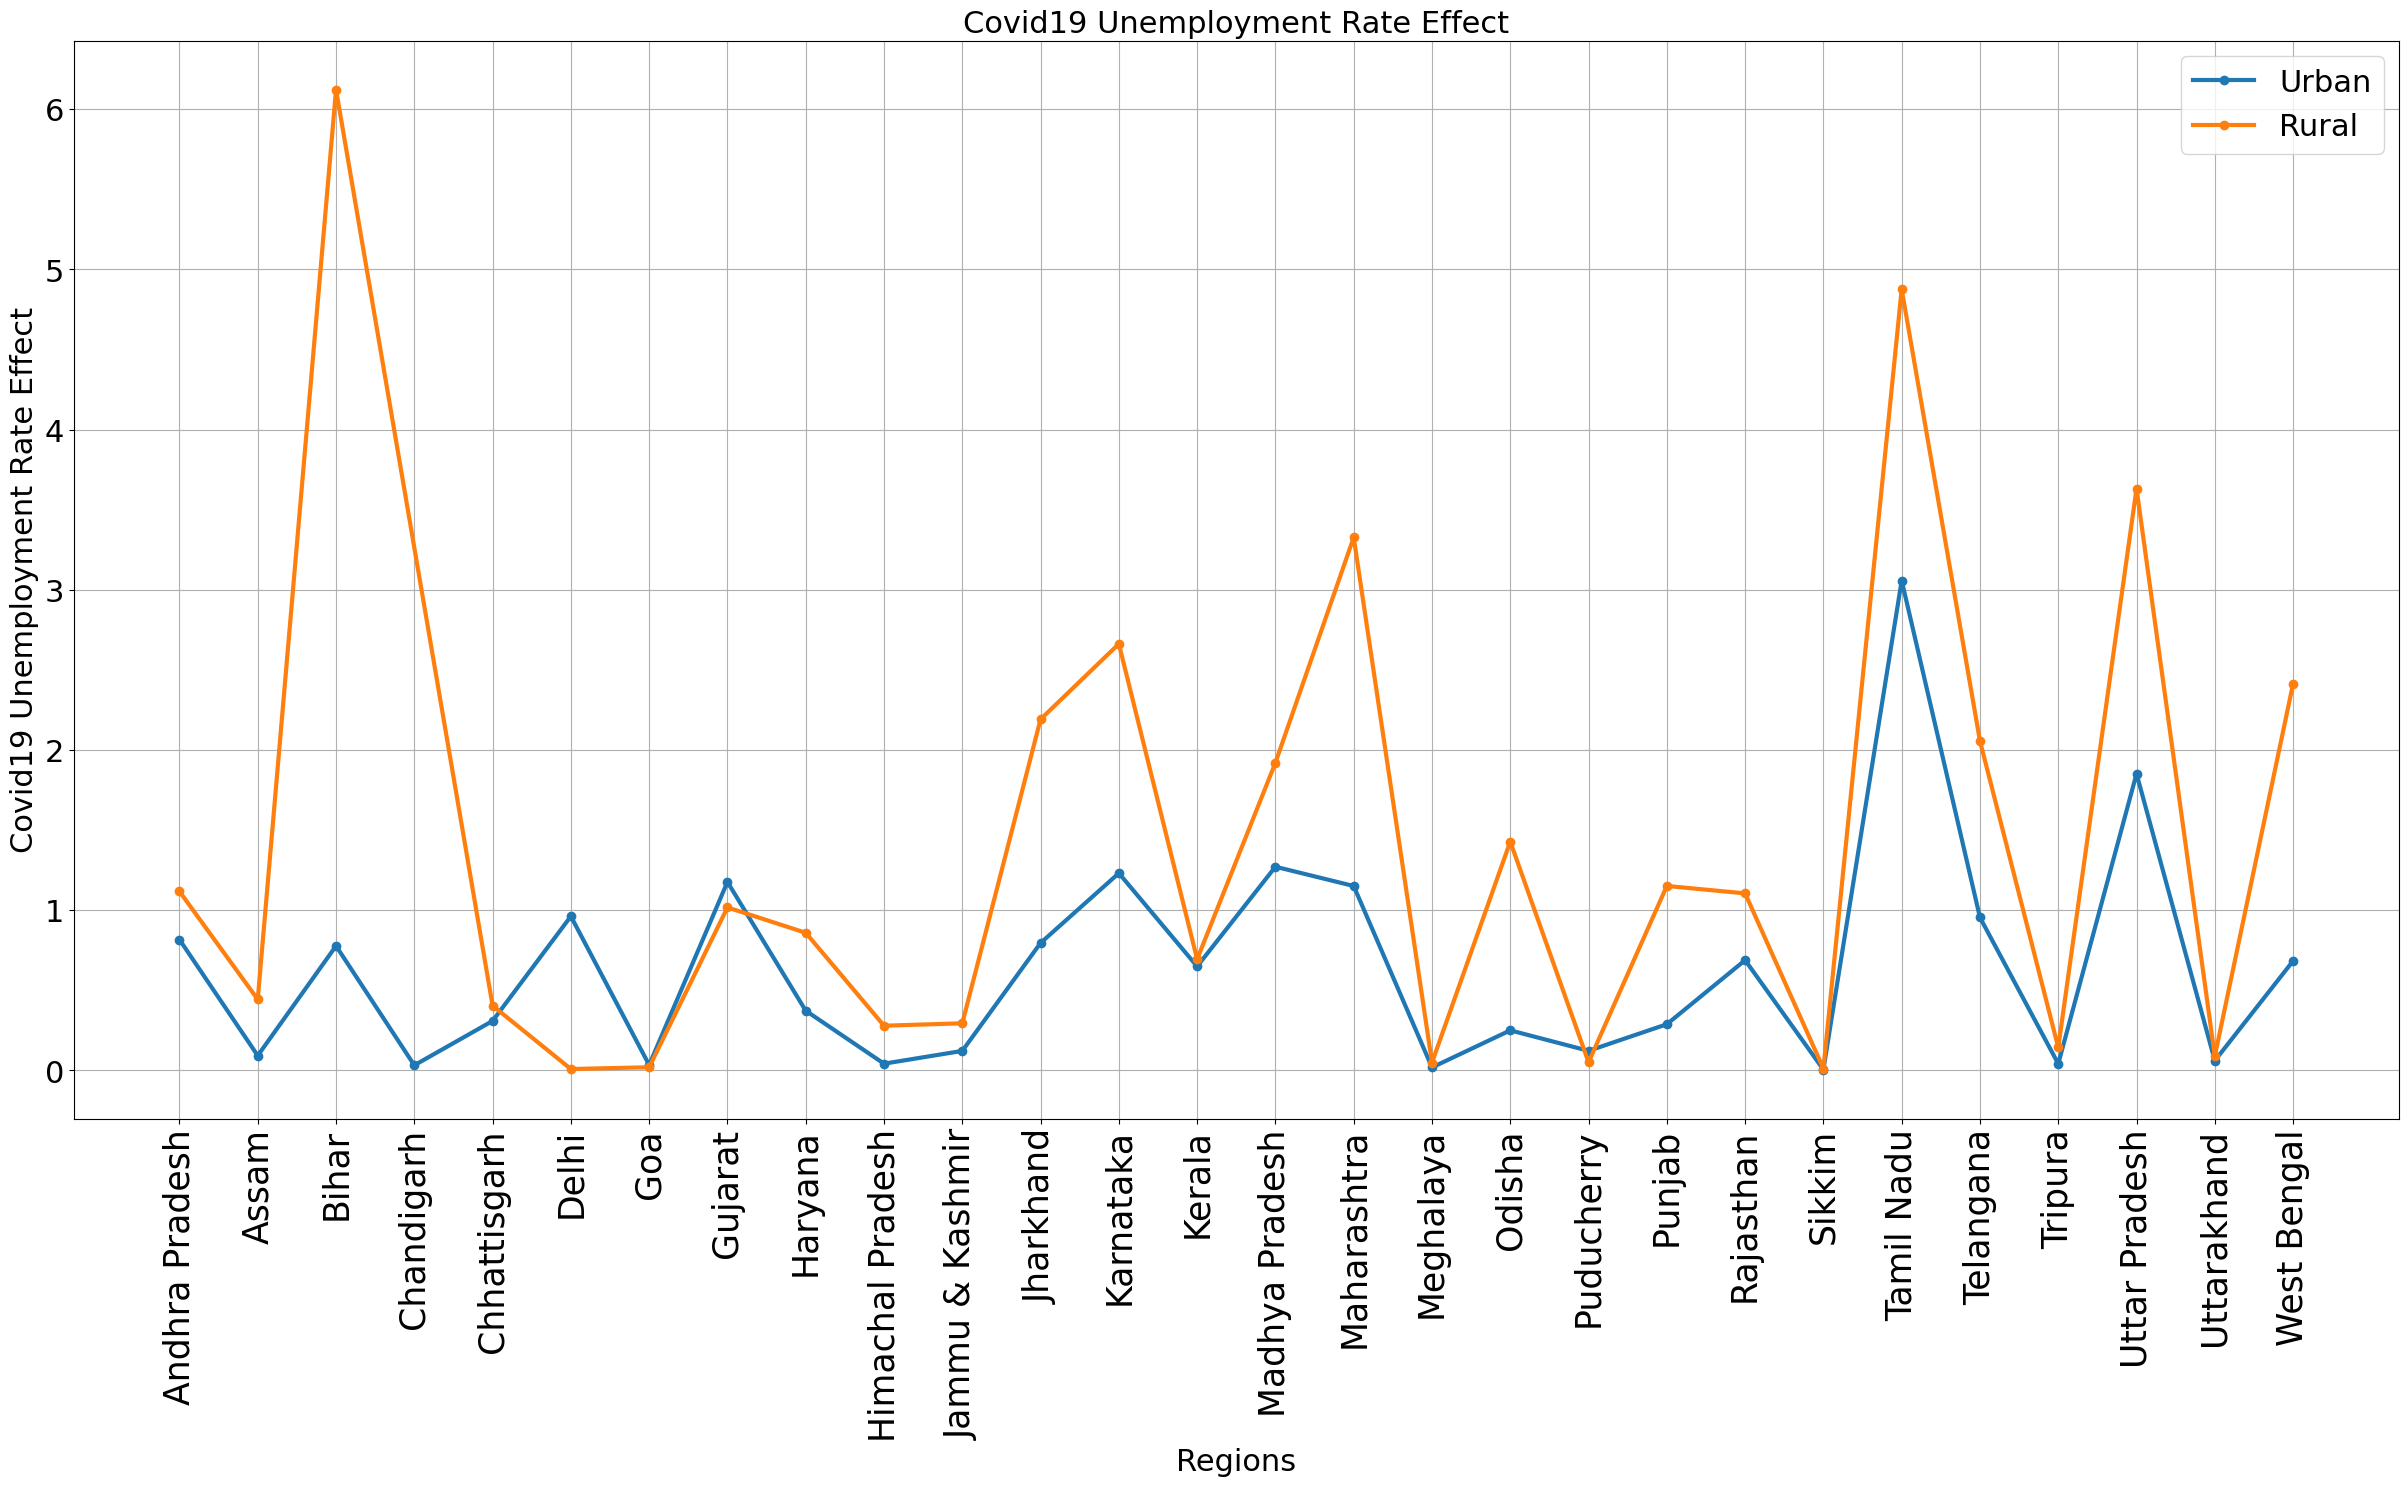

In [49]:
plot_comparison(urban_grouped_stats['Covid19 Unemployment Rate Effect'], 
                rural_grouped_stats['Covid19 Unemployment Rate Effect'], 
                'Covid19 Unemployment Rate Effect', 
                'Covid19 Unemployment Rate Effect')

In [50]:
def plot_heatmap_effect(data, title):
    fig, axs = plt.subplots(1, 2, figsize=(30,25))  # Create a figure with two subplots

    # Plot the first column
    sns.heatmap(data.loc[:, ['Covid19 Unemployment Rate Effect']], ax=axs[0], annot=True,cmap="YlGnBu",annot_kws={"size": 22})
    axs[0].set_title('Unemployment Rate', fontsize=15)

    # Plot the second column
    sns.heatmap(data.loc[:, ['Covid19 Labour Participation Rate Effect']], ax=axs[1], annot=True, cmap="YlGnBu",annot_kws={"size": 22})
    axs[1].set_title('Labour Participation Rate', fontsize=15)

    # Set the overall title for the figure
    plt.suptitle(title, fontsize=15)
    axs[0].set_xlabel('Statistics', fontsize=15)
    axs[0].set_ylabel('Region', fontsize=15)
    axs[1].set_xlabel('Statistics', fontsize=15)
    axs[1].set_ylabel('Region', fontsize=15)
    axs[0].tick_params(axis='x', rotation=45, labelsize=21)
    axs[0].tick_params(axis='y', labelsize=22)
    axs[1].tick_params(axis='x', rotation=45, labelsize=21)
    axs[1].tick_params(axis='y', labelsize=22)
    plt.tight_layout()

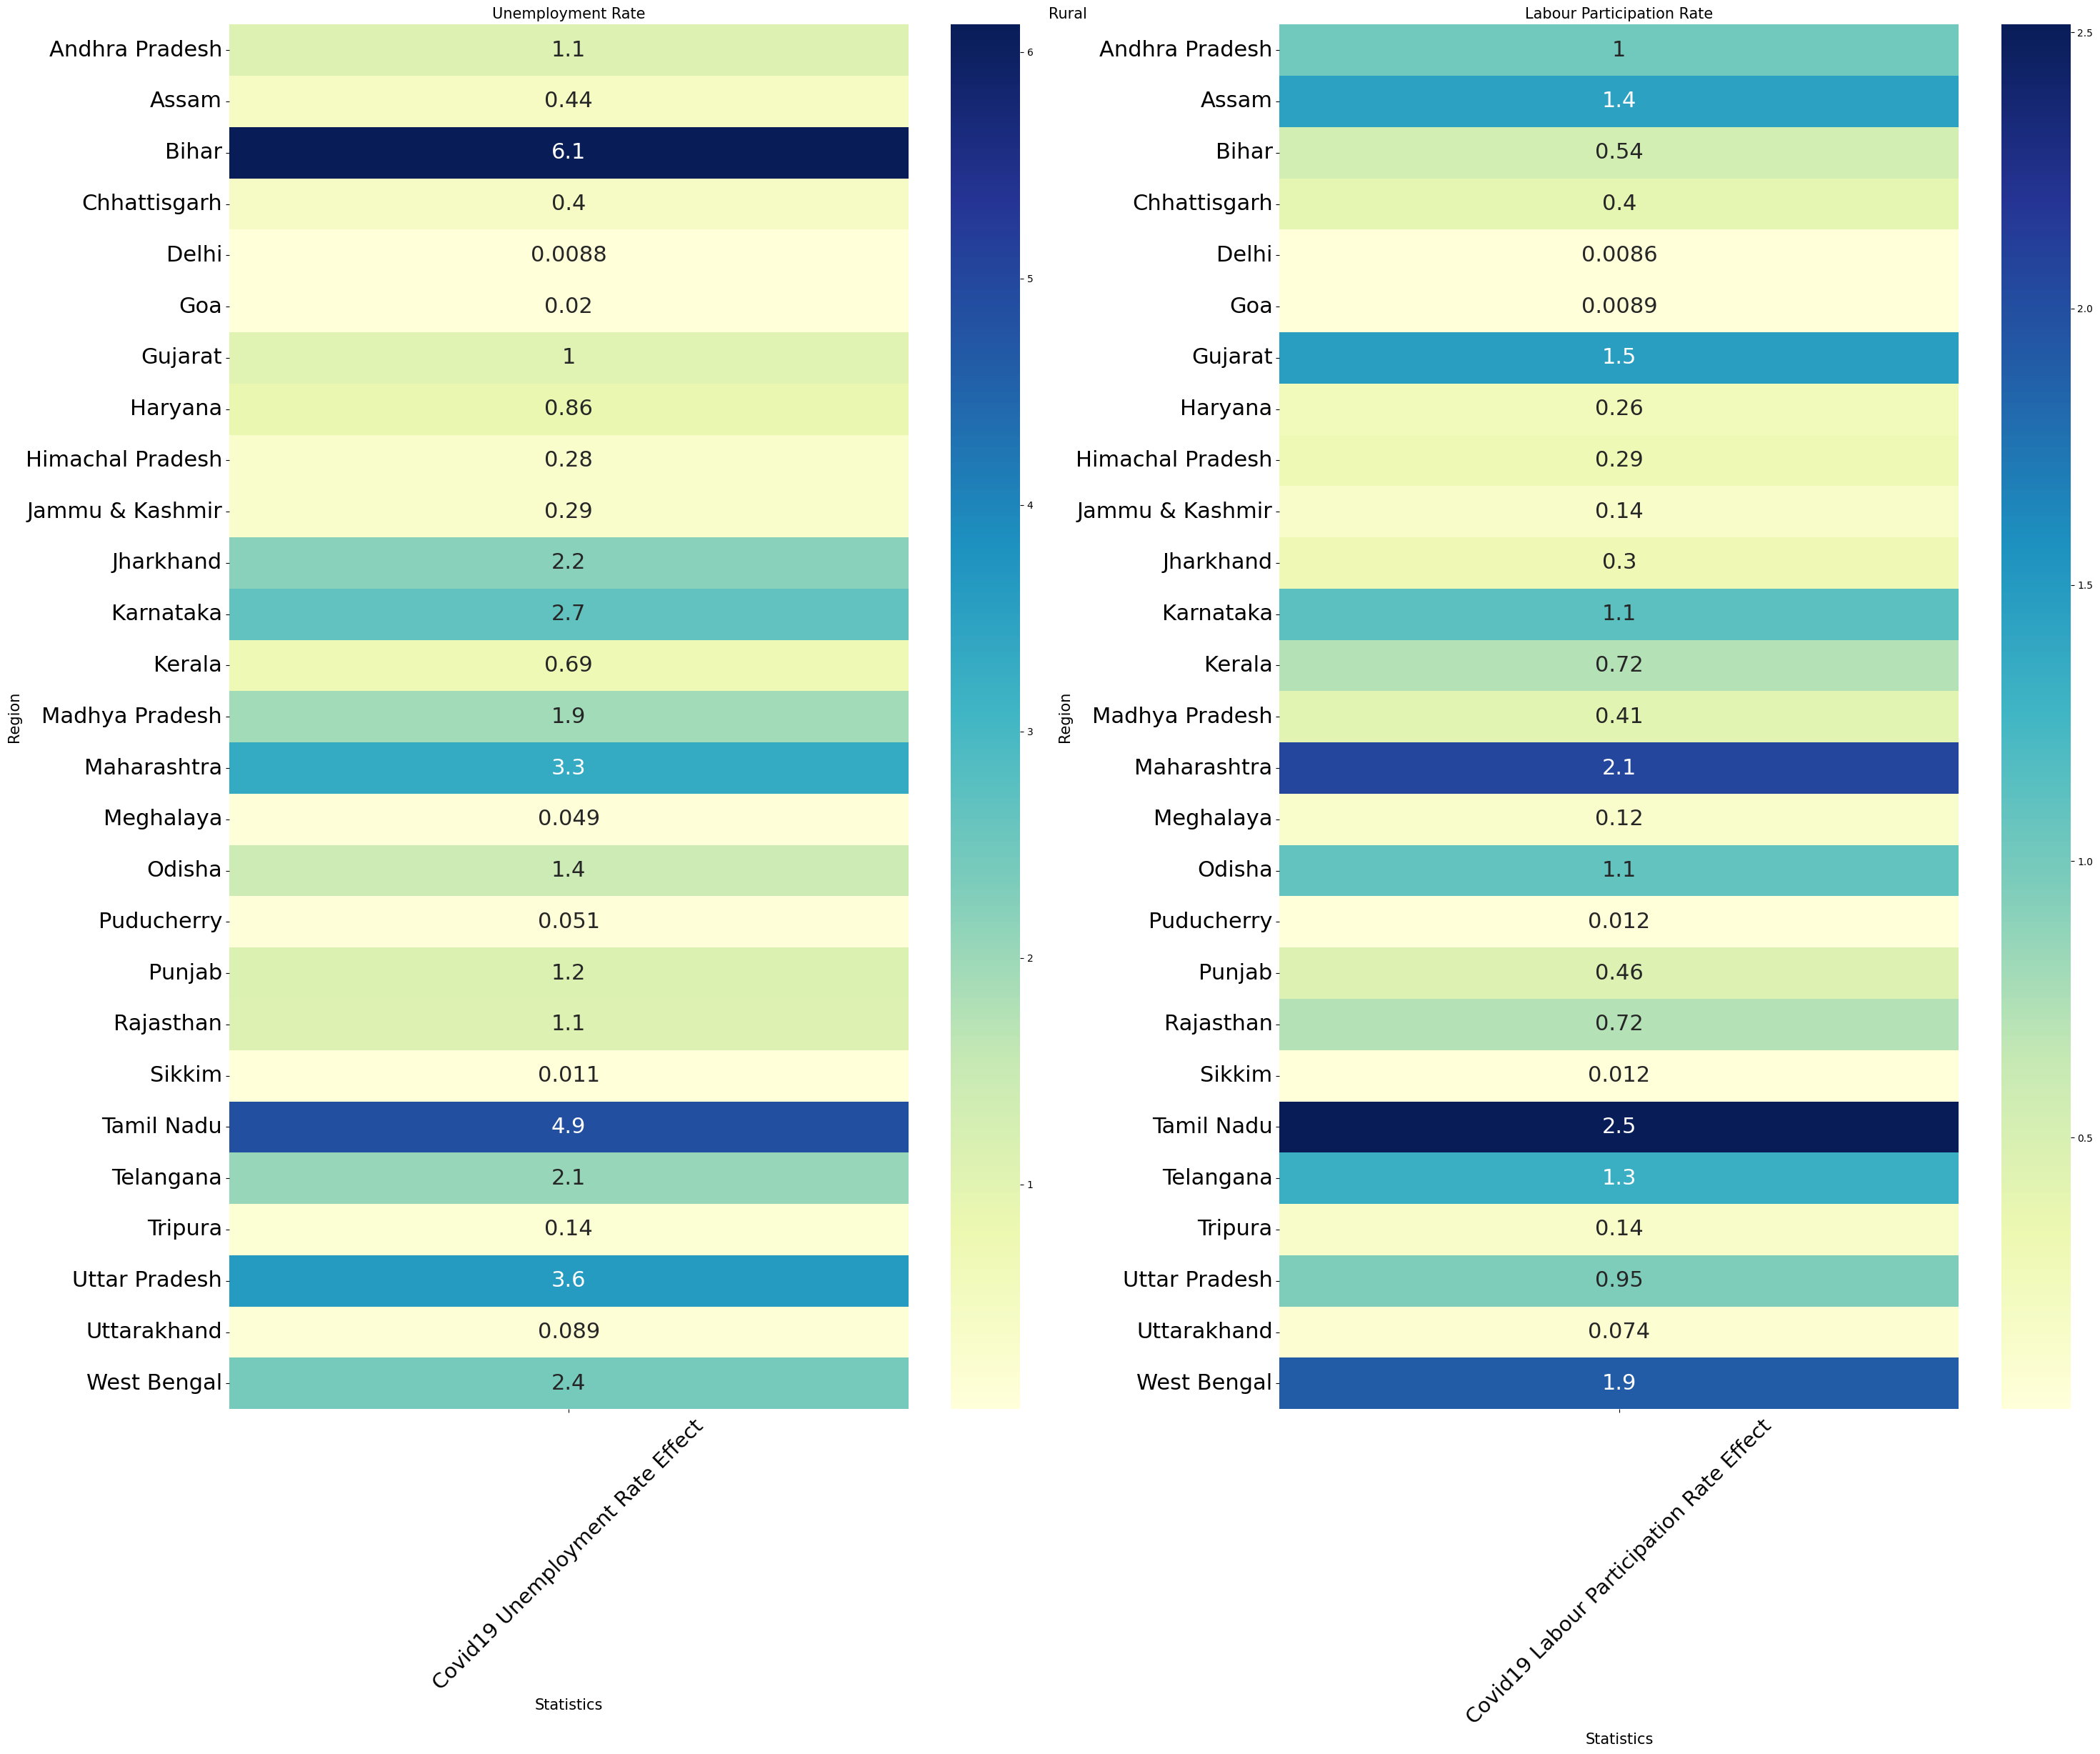

In [51]:
plot_heatmap_effect(rural_grouped_stats, 'Rural')

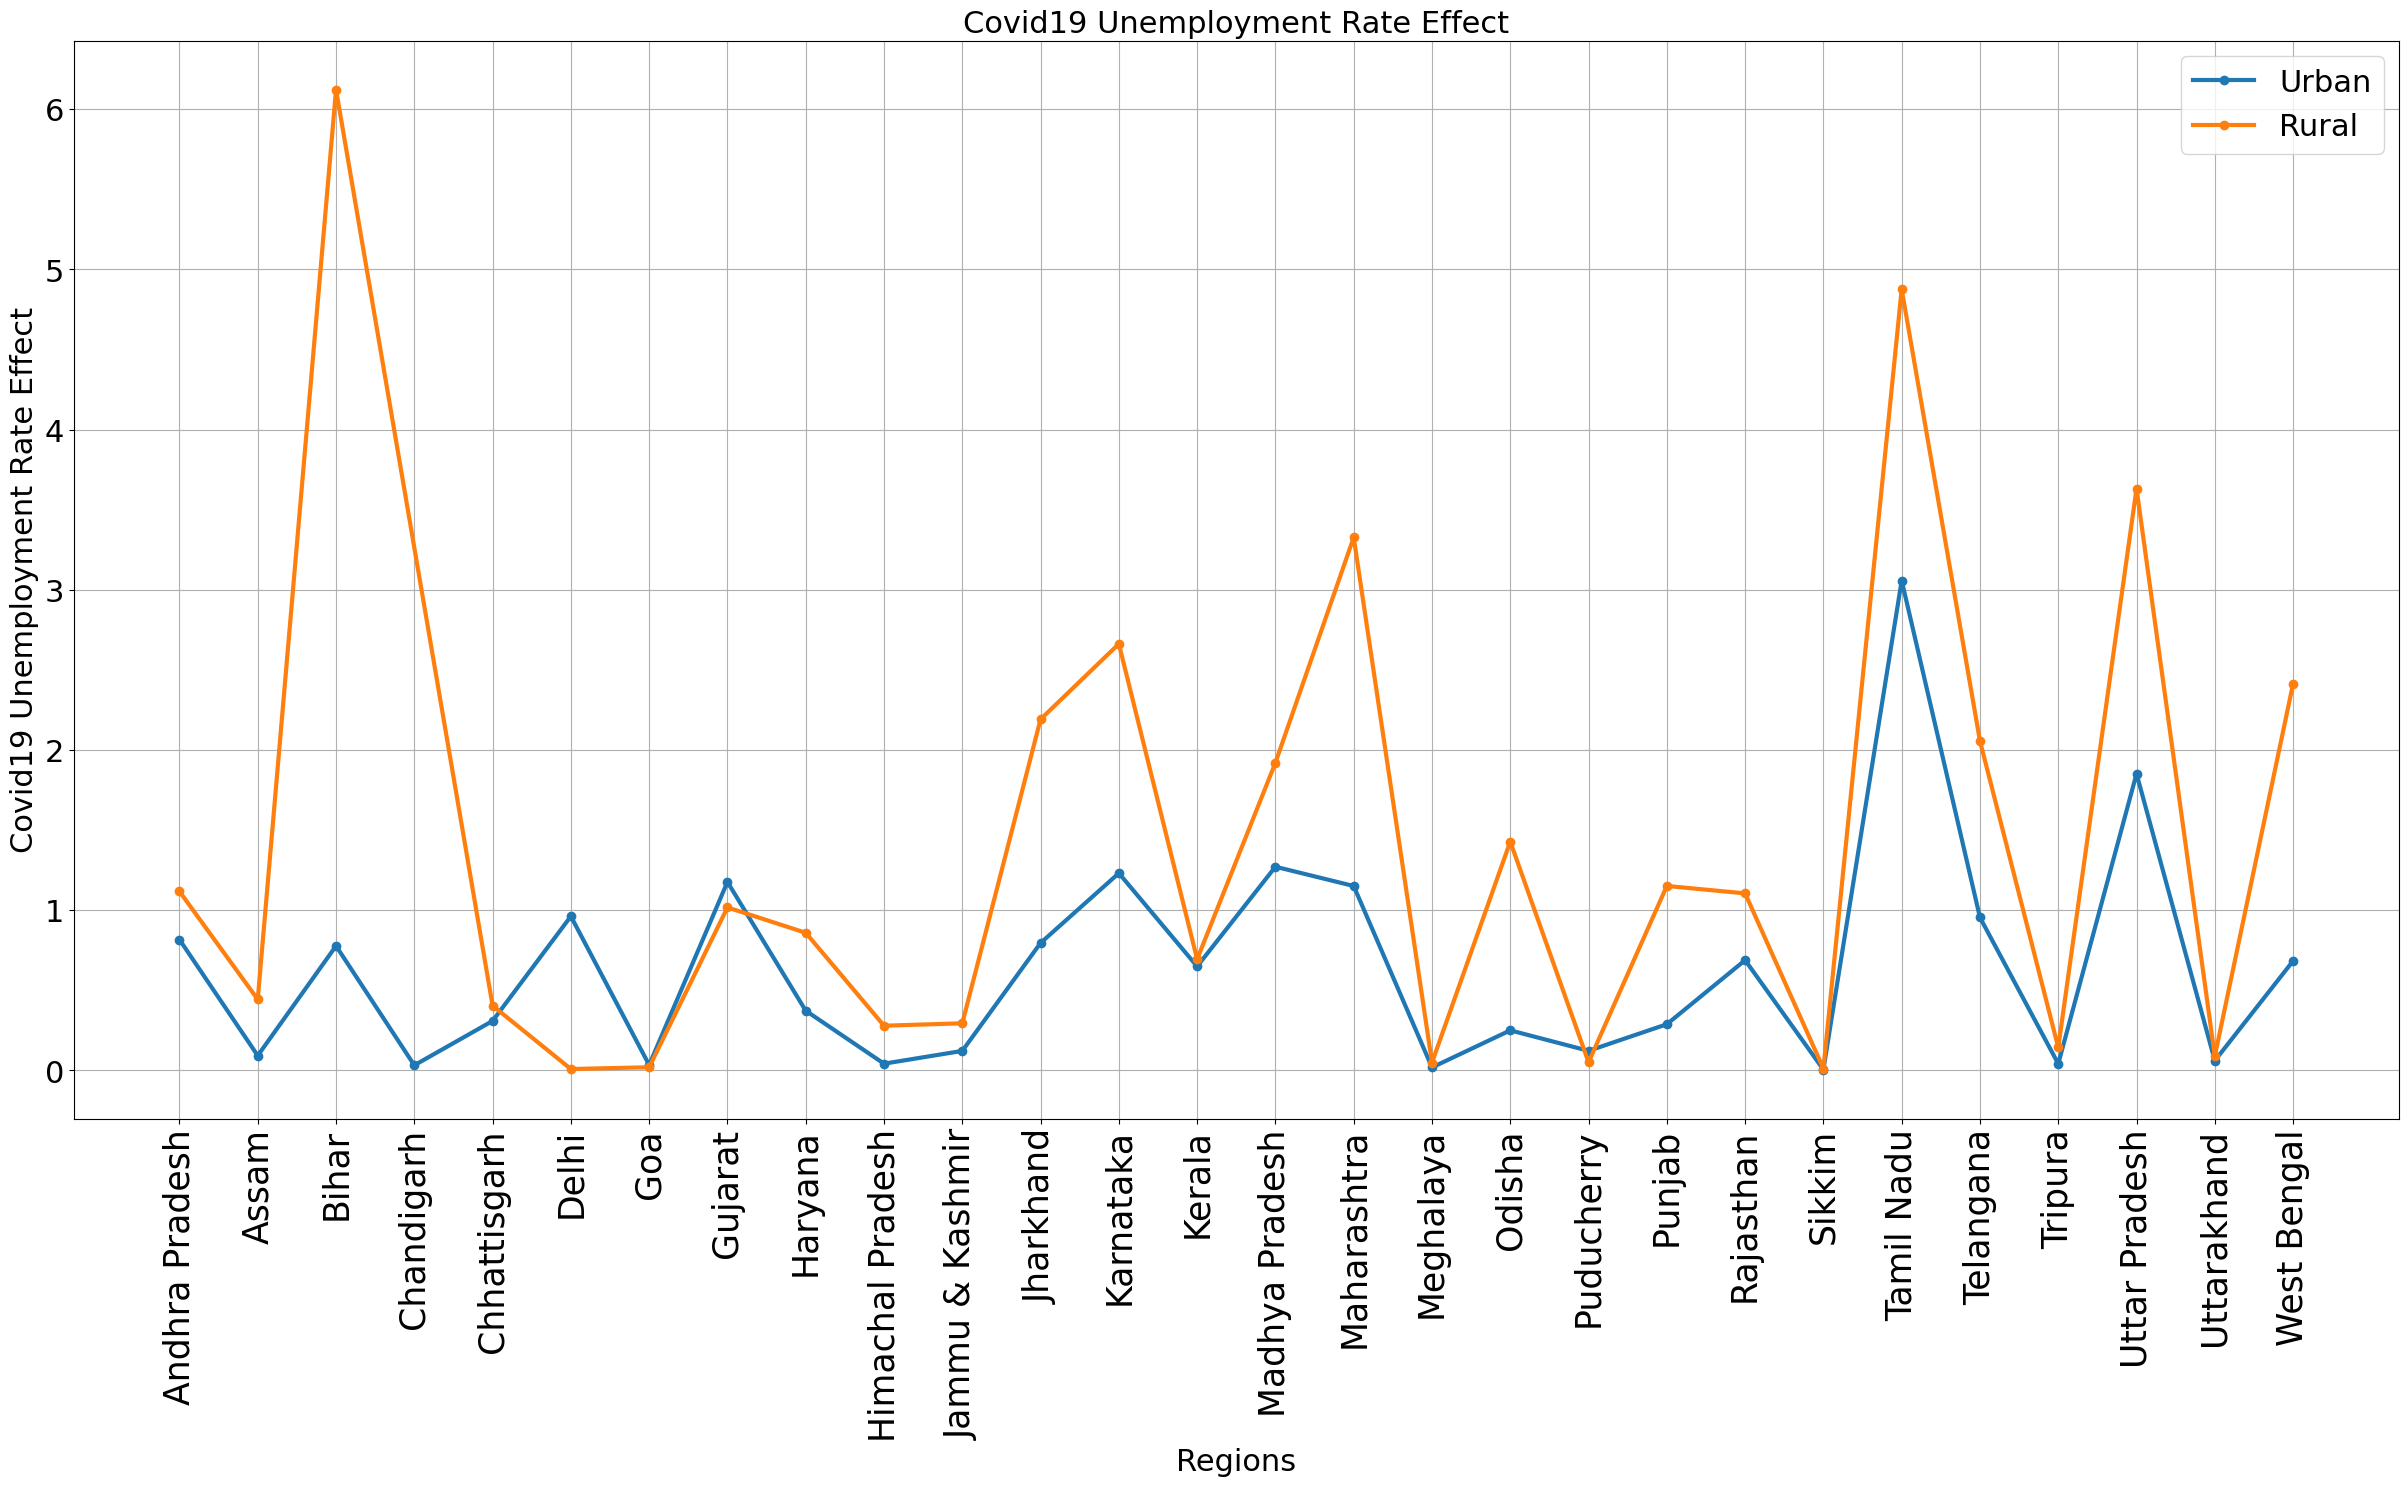

In [52]:
plot_comparison(urban_grouped_stats['Covid19 Unemployment Rate Effect'], 
                rural_grouped_stats['Covid19 Unemployment Rate Effect'], 
                'Covid19 Unemployment Rate Effect', 
                'Covid19 Unemployment Rate Effect')

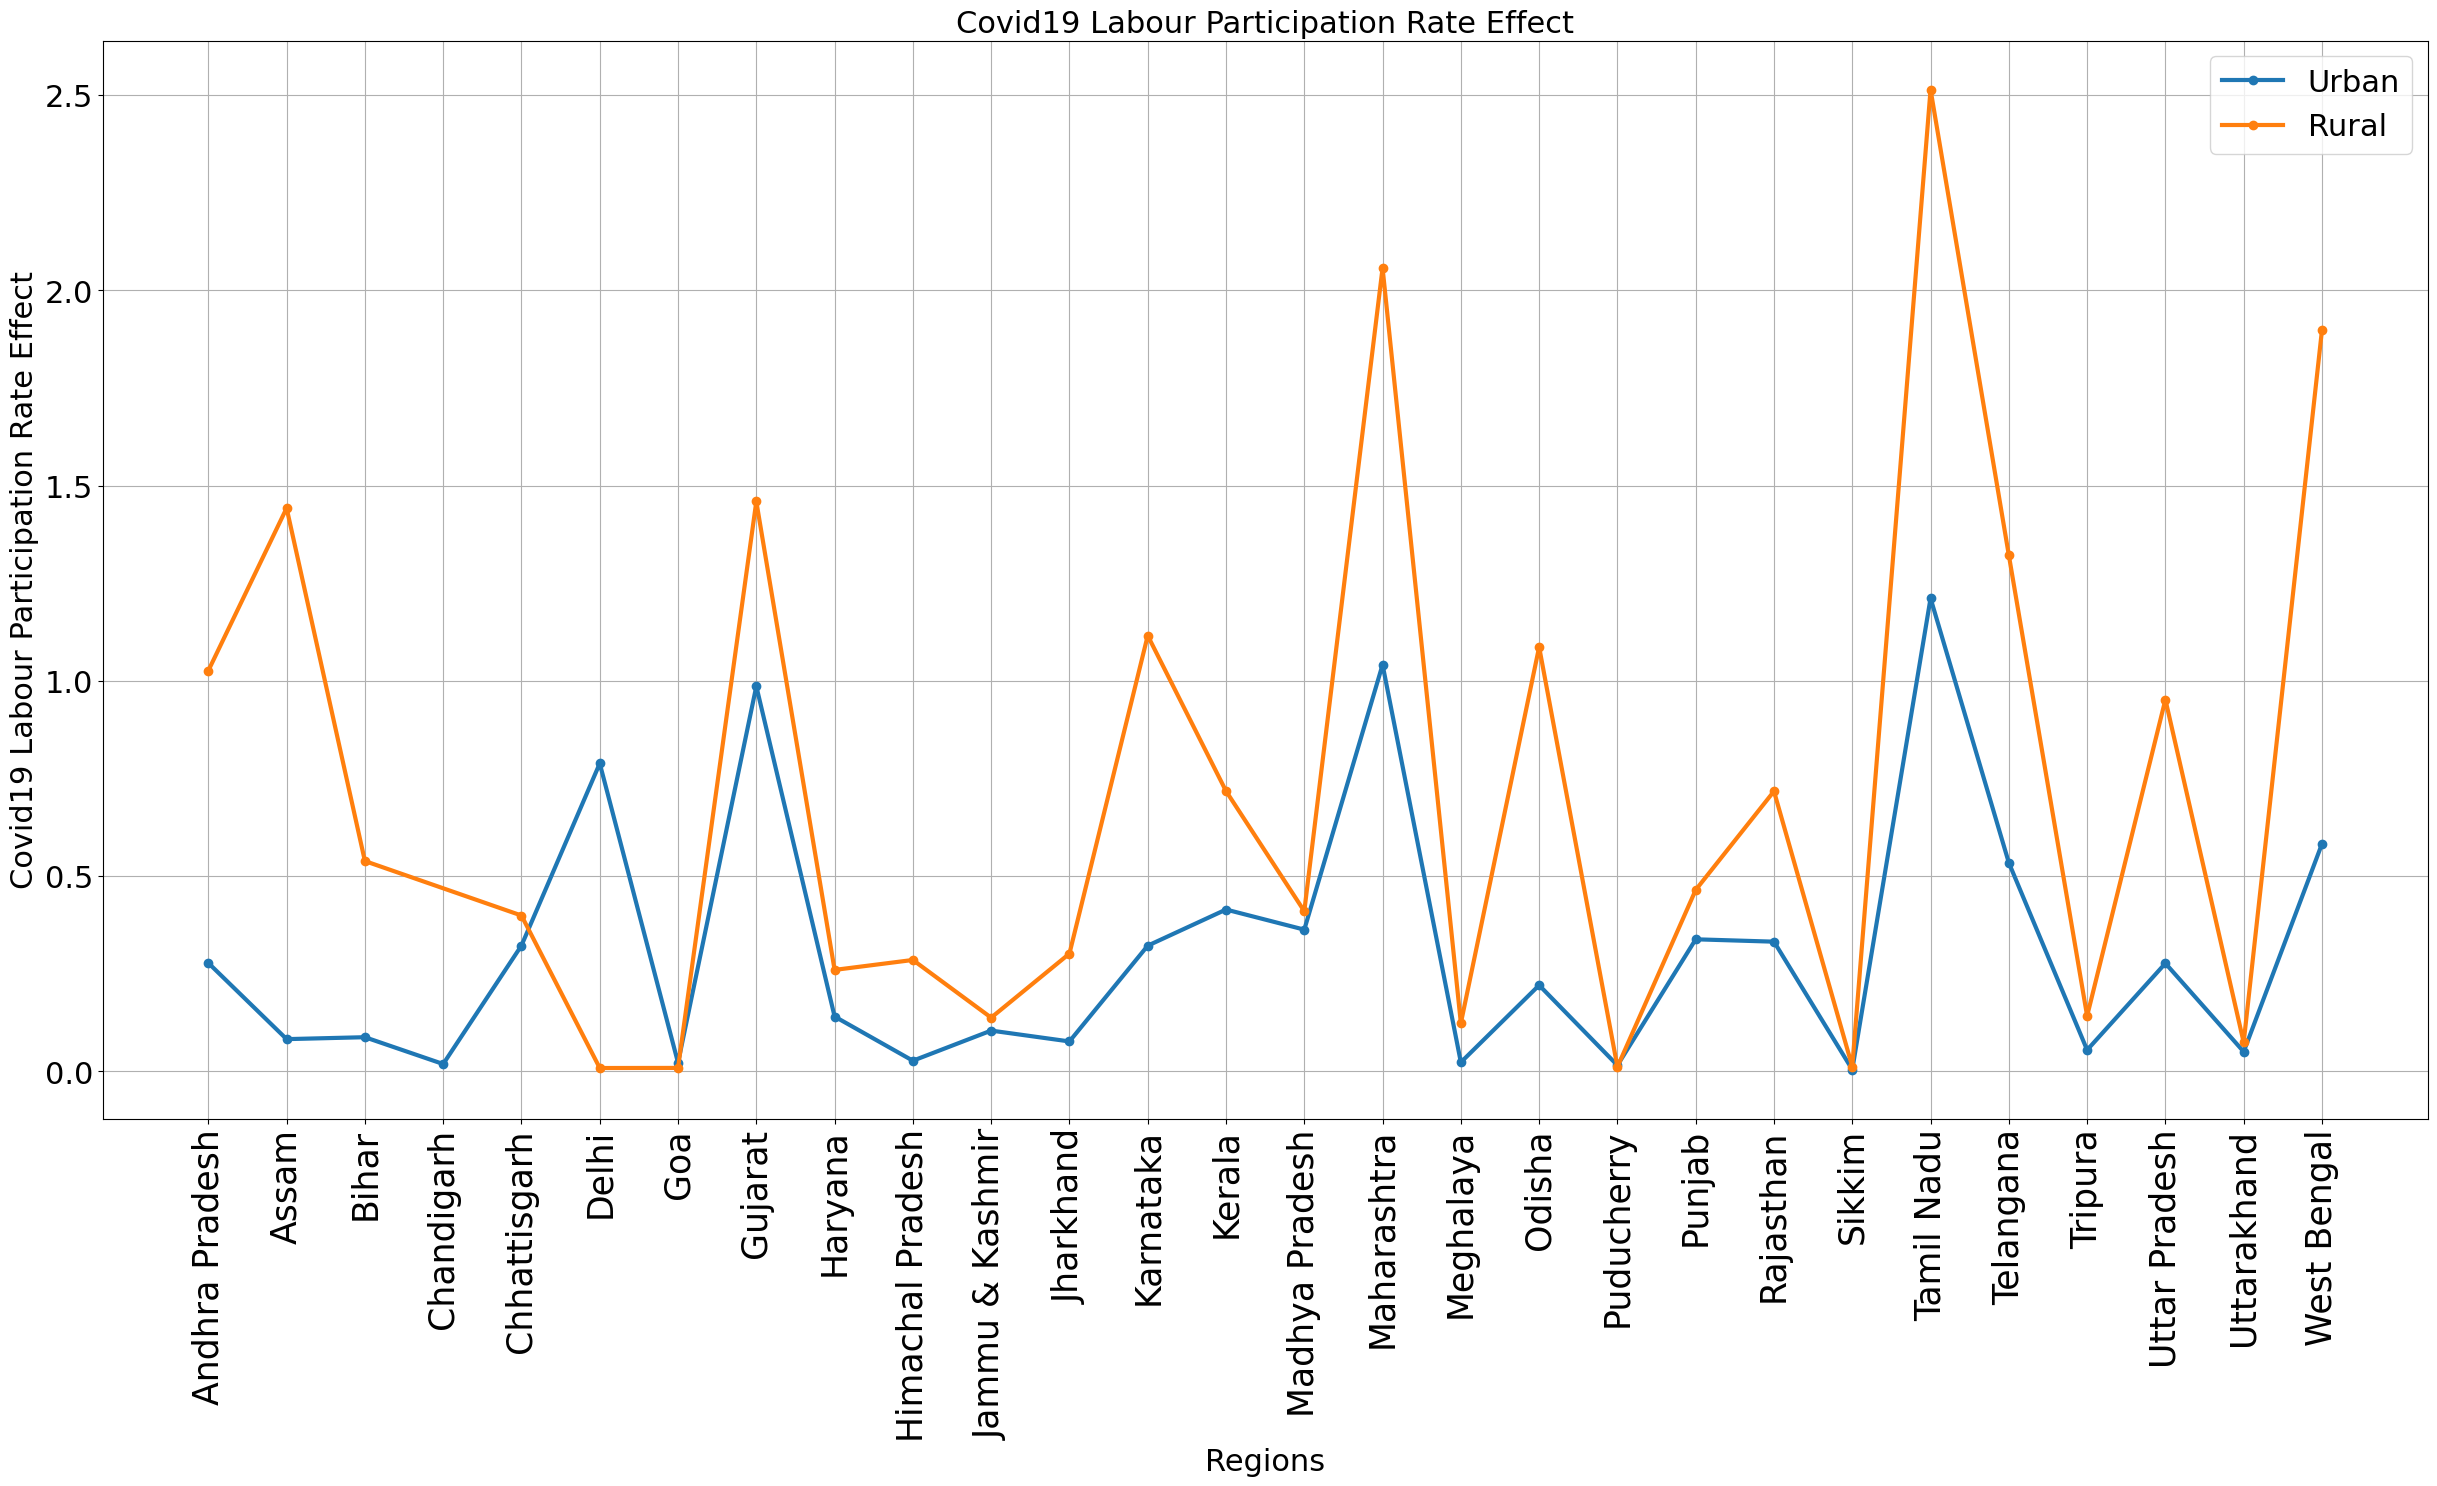

In [53]:
plot_comparison(urban_grouped_stats['Covid19 Labour Participation Rate Effect'], 
                rural_grouped_stats['Covid19 Labour Participation Rate Effect'], 
                'Covid19 Labour Participation Rate Effect', 
                'Covid19 Labour Participation Rate Effect')

SUMMARY AND CONCLUSION

1- Despite of Higher Unemployment Rate in Urban Area than Rural Area , Rural Area damaged badly because of high population except Delhi state

2- Puducherry & Tripura states shown very high Unemployment & low Labour Participation Rate but The low population of them make covid19 effect Nothing

3- Bahir high Unemployment & low Labour Participation Rate may be because people died